# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:08:14.063486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:08:17.273783
2025-04-14 20:08:17.273783


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:08:11"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

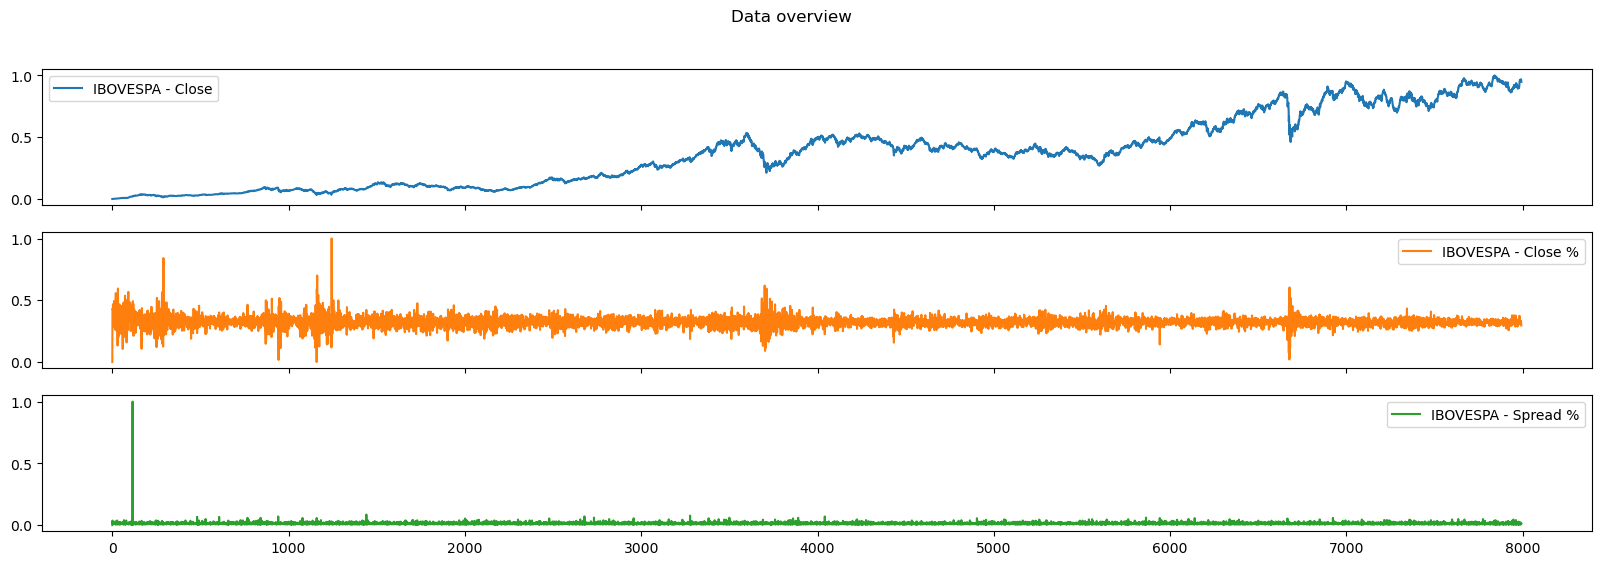

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

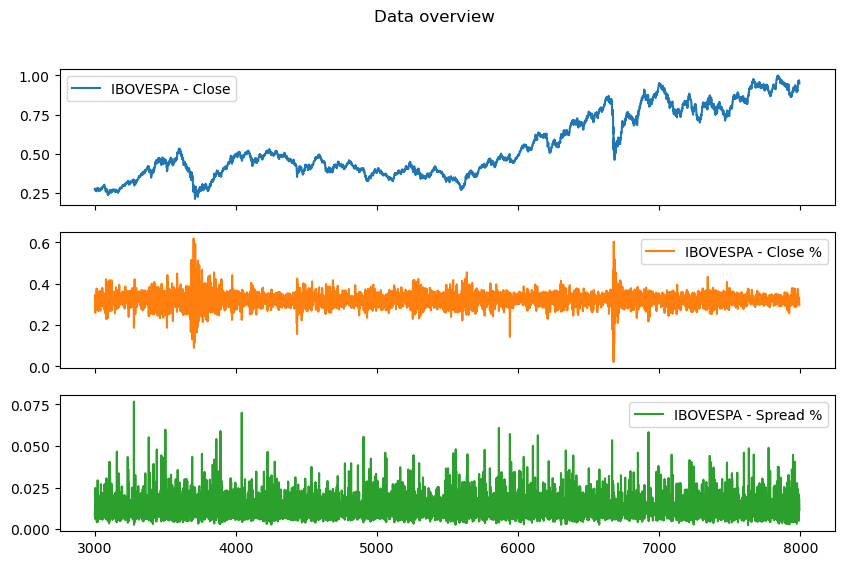

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

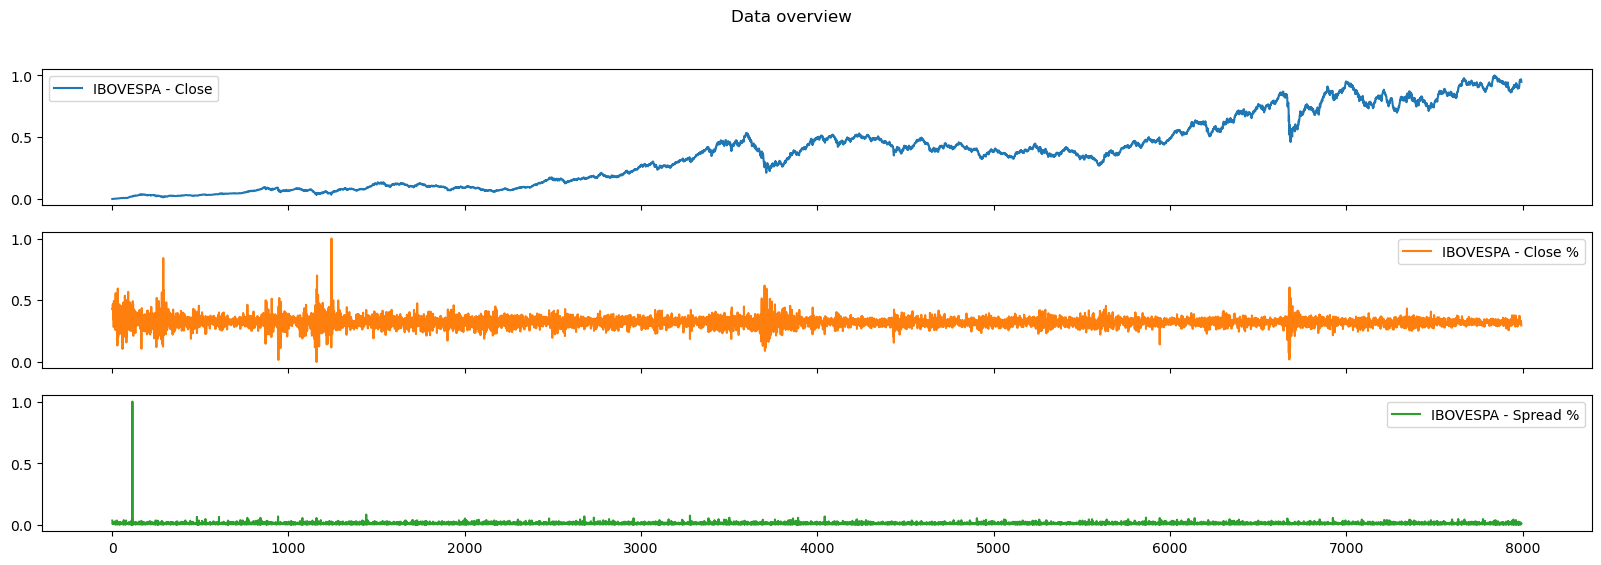

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

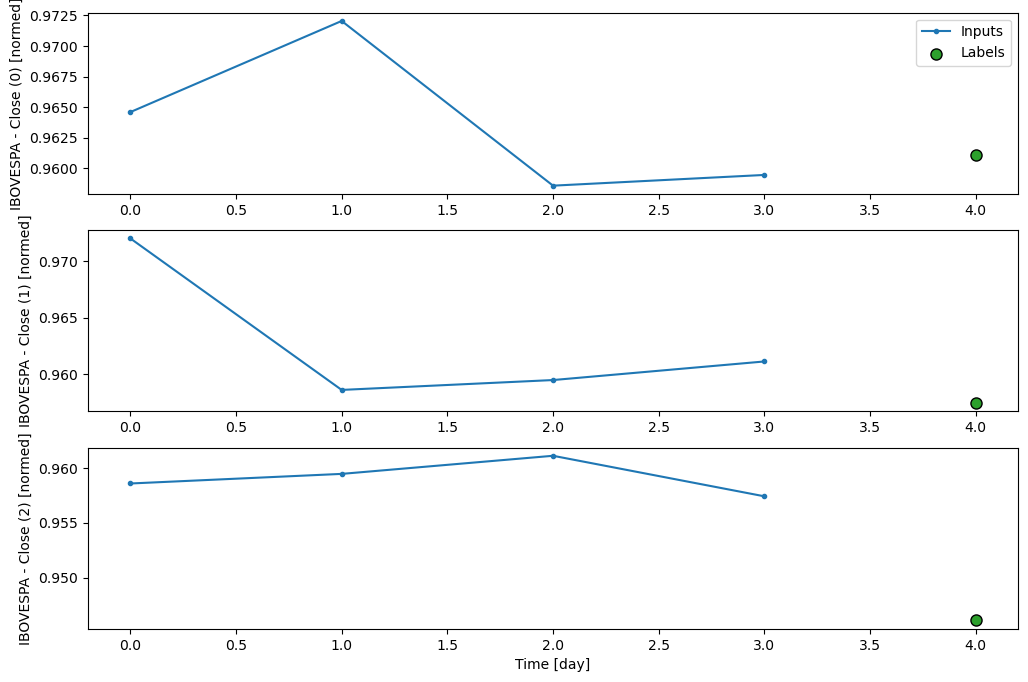

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:09 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 95.1590 - mean_squared_error: 2.0096e-04 - root_mean_squared_error: 0.0136  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 72.9134 - mean_squared_error: 1.7476e-04 - root_mean_squared_error: 0.0129

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.8090 - mean_squared_error: 1.7211e-04 - root_mean_squared_error: 0.0129

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.8640 - mean_squared_error: 1.8659e-04 - root_mean_squared_error: 0.0134

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.6609 - mean_squared_error: 2.2317e-04 - root_mean_squared_error: 0.0146

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 45.9562 - mean_squared_error: 2.4007e-04 - root_mean_squared_error: 0.0152

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 43.2236 - mean_squared_error: 2.6393e-04 - root_mean_squared_error: 0.0159

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 40.7462 - mean_squared_error: 2.9180e-04 - root_mean_squared_error: 0.0167

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 38.6509 - mean_squared_error: 3.2803e-04 - root_mean_squared_error: 0.0176

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 37.2481 - mean_squared_error: 3.7036e-04 - root_mean_squared_error: 0.0185

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 36.3124 - mean_squared_error: 4.6029e-04 - root_mean_squared_error: 0.0200

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 35.4152 - mean_squared_error: 6.2934e-04 - root_mean_squared_error: 0.0223

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 34.4235 - mean_squared_error: 8.1981e-04 - root_mean_squared_error: 0.0248

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 33.3443 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273    

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 32.4461 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 31.5690 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 30.7833 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 30.0561 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 29.4026 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 28.7483 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384 - val_loss: 0.2002 - val_mean_absolute_error: 0.2002 - val_mean_absolute_percentage_error: 21.5218 - val_mean_squared_error: 0.0414 - val_root_mean_squared_error: 0.2034 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5987 - mean_absolute_error: 0.5987 - mean_absolute_percentage_error: 25848.8965 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5987

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 9369.4980 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5481  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4478 - mean_absolute_error: 0.4478 - mean_absolute_percentage_error: 6212.2437 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4735

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 4759.2661 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4192

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 3901.5281 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3800

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 3328.3848 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3504

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 2915.6047 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3270

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 2602.4001 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3079

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 2355.5867 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2919

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 2169.6040 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2794

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 2013.6094 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2686

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1870.3427 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2584

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 1747.9236 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2494

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1649.5981 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2419

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 1562.7413 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2351

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 1479.3577 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2284

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1416.1111 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2233

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 1348.6322 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2177

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 1287.8815 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2127

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1240.9908 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2088 - val_loss: 0.1056 - val_mean_absolute_error: 0.1056 - val_mean_absolute_percentage_error: 11.2879 - val_mean_squared_error: 0.0123 - val_root_mean_squared_error: 0.1108 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5245 - mean_absolute_error: 0.5245 - mean_absolute_percentage_error: 22633.9961 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5245

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4942 - mean_absolute_error: 0.4942 - mean_absolute_percentage_error: 7981.6484 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4955  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 5567.9272 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4425

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 4277.5000 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3945

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 3513.3479 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3591

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 3001.6641 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3320

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 2632.0720 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3104

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 2350.9968 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2926

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 2129.2344 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2777

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1961.9255 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2659

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 1810.6556 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2548

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 1692.2217 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2458

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 1581.8004 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2371

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 1486.2008 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2293

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 1402.5317 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2223

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1328.6324 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2159

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1262.8274 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2101

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1208.1571 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2053

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 1154.5212 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2005

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 1124.0466 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.1977 - val_loss: 0.0391 - val_mean_absolute_error: 0.0391 - val_mean_absolute_percentage_error: 4.1554 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0438 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 11647.2832 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2704

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 3938.6853 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2238  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 2599.9084 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1857

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1986.9458 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1622

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 1626.6874 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1462

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1386.3212 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1342

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 1213.2460 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1249

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 1081.9746 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1174

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 978.6207 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1111 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 900.7969 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1062

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 830.5828 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1017

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 771.4801 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0979

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 720.9457 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0945

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 680.3414 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0917

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 641.6569 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0889

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 615.0306 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0869

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 588.4072 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0849

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 560.0303 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0828

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 534.5094 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0809

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 514.8345 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0794 - val_loss: 0.0201 - val_mean_absolute_error: 0.0201 - val_mean_absolute_percentage_error: 2.2384 - val_mean_squared_error: 6.1584e-04 - val_root_mean_squared_error: 0.0248 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 5684.7021 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1318

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1878.1191 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1005 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 1283.8031 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0865

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 980.4068 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0764 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 813.7140 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0698

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 699.8789 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0646

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 616.5812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 547.9930 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 498.1223 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 457.3803 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 423.4305 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 394.6834 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 368.0609 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 346.7831 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 326.5957 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 310.1325 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 294.2441 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 280.0556 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 267.3049 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 255.7799 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 254.9400 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 1.8011 - val_mean_squared_error: 4.1500e-04 - val_root_mean_squared_error: 0.0204 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 3956.7114 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0918

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 1282.2003 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 849.8051 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 664.5007 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 543.9639 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 468.9200 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 413.7955 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 368.2720 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 332.6181 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 303.8501 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 280.1045 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 260.1263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 243.0622 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 229.3645 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 218.2242 - mean_squared_error: 9.9414e-04 - root_mean_squared_error: 0.0283

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 209.0856 - mean_squared_error: 9.5651e-04 - root_mean_squared_error: 0.0277

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 198.3965 - mean_squared_error: 9.1266e-04 - root_mean_squared_error: 0.0270

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 189.5494 - mean_squared_error: 8.7785e-04 - root_mean_squared_error: 0.0264

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 180.9057 - mean_squared_error: 8.4926e-04 - root_mean_squared_error: 0.0260

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 173.1037 - mean_squared_error: 8.3240e-04 - root_mean_squared_error: 0.0259

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 172.5355 - mean_squared_error: 8.3133e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3462 - val_mean_squared_error: 2.4954e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 3962.2278 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0919

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 1345.4321 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0678 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 866.0101 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 668.8729 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 543.4847 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 461.0744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 402.2852 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 361.0312 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 325.7860 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 297.4684 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 274.2108 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 256.1067 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 239.2741 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 225.7720 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 213.8541 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 203.2487 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 192.9947 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 184.4941 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 176.1772 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 169.2078 - mean_squared_error: 9.9154e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_mean_absolute_percentage_error: 2.7819 - val_mean_squared_error: 7.8770e-04 - val_root_mean_squared_error: 0.0281 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 2937.2021 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 930.8521 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 605.0728 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 459.9578 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 375.8792 - mean_squared_error: 9.9491e-04 - root_mean_squared_error: 0.0290

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 320.0579 - mean_squared_error: 8.5731e-04 - root_mean_squared_error: 0.0267

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 280.2235 - mean_squared_error: 7.5984e-04 - root_mean_squared_error: 0.0250

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 250.1242 - mean_squared_error: 6.8666e-04 - root_mean_squared_error: 0.0237

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 226.4494 - mean_squared_error: 6.2946e-04 - root_mean_squared_error: 0.0226

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 208.6055 - mean_squared_error: 5.8621e-04 - root_mean_squared_error: 0.0217

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 192.5006 - mean_squared_error: 5.4912e-04 - root_mean_squared_error: 0.0210

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 179.9046 - mean_squared_error: 5.2111e-04 - root_mean_squared_error: 0.0205

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 168.1646 - mean_squared_error: 4.9460e-04 - root_mean_squared_error: 0.0200

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 158.7346 - mean_squared_error: 4.7289e-04 - root_mean_squared_error: 0.0195

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 150.4050 - mean_squared_error: 4.5345e-04 - root_mean_squared_error: 0.0191

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 142.4076 - mean_squared_error: 4.3470e-04 - root_mean_squared_error: 0.0187

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 135.2979 - mean_squared_error: 4.1827e-04 - root_mean_squared_error: 0.0184

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 129.3990 - mean_squared_error: 4.0552e-04 - root_mean_squared_error: 0.0181

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 123.6209 - mean_squared_error: 3.9460e-04 - root_mean_squared_error: 0.0179

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 119.9460 - mean_squared_error: 3.8828e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0179 - val_mean_absolute_error: 0.0179 - val_mean_absolute_percentage_error: 1.9012 - val_mean_squared_error: 4.1346e-04 - val_root_mean_squared_error: 0.0203 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 3532.0881 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0820

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 1139.8865 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 748.8051 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 571.7339 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 468.0147 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 399.0433 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 349.5009 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 311.9342 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 282.3378 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 260.0363 - mean_squared_error: 9.4439e-04 - root_mean_squared_error: 0.0276

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 239.9033 - mean_squared_error: 8.7845e-04 - root_mean_squared_error: 0.0265

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 229.1456 - mean_squared_error: 8.4398e-04 - root_mean_squared_error: 0.0259

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 217.1136 - mean_squared_error: 8.0552e-04 - root_mean_squared_error: 0.0253

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 206.4008 - mean_squared_error: 7.7110e-04 - root_mean_squared_error: 0.0247

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 196.7944 - mean_squared_error: 7.4001e-04 - root_mean_squared_error: 0.0242

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 186.4939 - mean_squared_error: 7.0648e-04 - root_mean_squared_error: 0.0236

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 176.5959 - mean_squared_error: 6.7402e-04 - root_mean_squared_error: 0.0230

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 168.4321 - mean_squared_error: 6.4711e-04 - root_mean_squared_error: 0.0225

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 160.4771 - mean_squared_error: 6.2150e-04 - root_mean_squared_error: 0.0221

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 153.3096 - mean_squared_error: 5.9917e-04 - root_mean_squared_error: 0.0217

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 149.2405 - mean_squared_error: 5.8676e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8995 - val_mean_squared_error: 1.0906e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 3132.5466 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0727

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 1059.1255 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 684.5461 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 519.9678 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 424.6321 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 361.3869 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 316.0172 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 281.6915 - mean_squared_error: 9.1548e-04 - root_mean_squared_error: 0.0276

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 256.5868 - mean_squared_error: 8.3902e-04 - root_mean_squared_error: 0.0262

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 234.4433 - mean_squared_error: 7.7283e-04 - root_mean_squared_error: 0.0251

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 216.2091 - mean_squared_error: 7.2813e-04 - root_mean_squared_error: 0.0244

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 201.9920 - mean_squared_error: 7.0102e-04 - root_mean_squared_error: 0.0240

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 192.6238 - mean_squared_error: 6.8315e-04 - root_mean_squared_error: 0.0238

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 181.5350 - mean_squared_error: 6.6100e-04 - root_mean_squared_error: 0.0235

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 171.7719 - mean_squared_error: 6.4025e-04 - root_mean_squared_error: 0.0232

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 162.4244 - mean_squared_error: 6.1930e-04 - root_mean_squared_error: 0.0228

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 154.7387 - mean_squared_error: 6.0127e-04 - root_mean_squared_error: 0.0225

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 147.2688 - mean_squared_error: 5.8331e-04 - root_mean_squared_error: 0.0222

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 140.5538 - mean_squared_error: 5.6709e-04 - root_mean_squared_error: 0.0219

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 134.4814 - mean_squared_error: 5.5221e-04 - root_mean_squared_error: 0.0217

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 134.0389 - mean_squared_error: 5.5112e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7463 - val_mean_squared_error: 7.3981e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 2764.5620 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0642

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 932.6845 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 604.5717 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 459.2141 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 380.3377 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 323.0383 - mean_squared_error: 9.2353e-04 - root_mean_squared_error: 0.0283

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 282.2128 - mean_squared_error: 8.1695e-04 - root_mean_squared_error: 0.0264

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 253.5512 - mean_squared_error: 7.4096e-04 - root_mean_squared_error: 0.0250

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 230.6961 - mean_squared_error: 6.7982e-04 - root_mean_squared_error: 0.0238

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 210.5831 - mean_squared_error: 6.2592e-04 - root_mean_squared_error: 0.0227

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 195.1842 - mean_squared_error: 5.8504e-04 - root_mean_squared_error: 0.0219

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 182.0908 - mean_squared_error: 5.5037e-04 - root_mean_squared_error: 0.0212

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 170.8073 - mean_squared_error: 5.2060e-04 - root_mean_squared_error: 0.0206

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 160.2059 - mean_squared_error: 4.9245e-04 - root_mean_squared_error: 0.0200

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 150.9648 - mean_squared_error: 4.6782e-04 - root_mean_squared_error: 0.0194

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 142.8308 - mean_squared_error: 4.4607e-04 - root_mean_squared_error: 0.0189

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 136.1363 - mean_squared_error: 4.2820e-04 - root_mean_squared_error: 0.0185

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 129.6252 - mean_squared_error: 4.1145e-04 - root_mean_squared_error: 0.0181

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 124.2003 - mean_squared_error: 3.9900e-04 - root_mean_squared_error: 0.0179

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 118.8655 - mean_squared_error: 3.8775e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8344 - val_mean_squared_error: 9.6011e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 2955.9722 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 953.1951 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 642.3840 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 486.9553 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 397.1282 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 337.7808 - mean_squared_error: 9.9019e-04 - root_mean_squared_error: 0.0290

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 298.2351 - mean_squared_error: 8.8249e-04 - root_mean_squared_error: 0.0272

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 265.5499 - mean_squared_error: 7.9219e-04 - root_mean_squared_error: 0.0256

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 239.9250 - mean_squared_error: 7.2074e-04 - root_mean_squared_error: 0.0242

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 219.2383 - mean_squared_error: 6.6326e-04 - root_mean_squared_error: 0.0231

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 203.3710 - mean_squared_error: 6.2045e-04 - root_mean_squared_error: 0.0223

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 191.9748 - mean_squared_error: 5.9078e-04 - root_mean_squared_error: 0.0217

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 179.1149 - mean_squared_error: 5.5737e-04 - root_mean_squared_error: 0.0211

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 168.0229 - mean_squared_error: 5.2816e-04 - root_mean_squared_error: 0.0205

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 159.0482 - mean_squared_error: 5.0425e-04 - root_mean_squared_error: 0.0200

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 151.0716 - mean_squared_error: 4.8281e-04 - root_mean_squared_error: 0.0196

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 143.3685 - mean_squared_error: 4.6203e-04 - root_mean_squared_error: 0.0191

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 136.4849 - mean_squared_error: 4.4376e-04 - root_mean_squared_error: 0.0187

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 130.7472 - mean_squared_error: 4.2888e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 125.1028 - mean_squared_error: 4.1434e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8222 - val_mean_squared_error: 9.3075e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 3193.1414 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 1041.0194 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 689.8344 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 529.0226 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 434.1181 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 370.6865 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 328.0907 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 292.7186 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 266.8125 - mean_squared_error: 9.5987e-04 - root_mean_squared_error: 0.0284

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 243.9250 - mean_squared_error: 8.8444e-04 - root_mean_squared_error: 0.0271

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 226.3504 - mean_squared_error: 8.2710e-04 - root_mean_squared_error: 0.0261

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 210.2204 - mean_squared_error: 7.7450e-04 - root_mean_squared_error: 0.0252

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 197.4312 - mean_squared_error: 7.3261e-04 - root_mean_squared_error: 0.0244

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 185.3812 - mean_squared_error: 6.9278e-04 - root_mean_squared_error: 0.0237

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 175.6139 - mean_squared_error: 6.6030e-04 - root_mean_squared_error: 0.0230

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 166.9195 - mean_squared_error: 6.3126e-04 - root_mean_squared_error: 0.0225

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 159.7431 - mean_squared_error: 6.0724e-04 - root_mean_squared_error: 0.0220

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 152.0924 - mean_squared_error: 5.8197e-04 - root_mean_squared_error: 0.0215

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 145.2097 - mean_squared_error: 5.5992e-04 - root_mean_squared_error: 0.0211

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 139.4398 - mean_squared_error: 5.4165e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7784 - val_mean_squared_error: 8.2612e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 2941.7720 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 995.4517 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 641.9572 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 486.8004 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 397.2420 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 337.9331 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 298.4382 - mean_squared_error: 8.9990e-04 - root_mean_squared_error: 0.0275

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 265.8574 - mean_squared_error: 8.0977e-04 - root_mean_squared_error: 0.0259

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 240.3243 - mean_squared_error: 7.3885e-04 - root_mean_squared_error: 0.0247

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 221.1380 - mean_squared_error: 6.8526e-04 - root_mean_squared_error: 0.0236

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 208.8407 - mean_squared_error: 6.5126e-04 - root_mean_squared_error: 0.0230

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 193.5361 - mean_squared_error: 6.0917e-04 - root_mean_squared_error: 0.0222

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 181.4559 - mean_squared_error: 5.7594e-04 - root_mean_squared_error: 0.0215

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 170.1163 - mean_squared_error: 5.4450e-04 - root_mean_squared_error: 0.0209

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 160.9536 - mean_squared_error: 5.1889e-04 - root_mean_squared_error: 0.0204

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 152.1823 - mean_squared_error: 4.9426e-04 - root_mean_squared_error: 0.0198

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 144.4050 - mean_squared_error: 4.7238e-04 - root_mean_squared_error: 0.0194

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 137.4582 - mean_squared_error: 4.5336e-04 - root_mean_squared_error: 0.0190

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 131.2153 - mean_squared_error: 4.3798e-04 - root_mean_squared_error: 0.0186

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 125.5718 - mean_squared_error: 4.2525e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0742 - val_mean_squared_error: 1.4751e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 2464.7974 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 793.9722 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 521.7892 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 398.0016 - mean_squared_error: 9.3794e-04 - root_mean_squared_error: 0.0288

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 325.5752 - mean_squared_error: 7.7929e-04 - root_mean_squared_error: 0.0259

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 277.3781 - mean_squared_error: 6.7121e-04 - root_mean_squared_error: 0.0238

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 242.7222 - mean_squared_error: 5.9206e-04 - root_mean_squared_error: 0.0222

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 216.4617 - mean_squared_error: 5.3138e-04 - root_mean_squared_error: 0.0208

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 195.7995 - mean_squared_error: 4.8337e-04 - root_mean_squared_error: 0.0197

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 180.2481 - mean_squared_error: 4.4759e-04 - root_mean_squared_error: 0.0189

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 166.2194 - mean_squared_error: 4.1617e-04 - root_mean_squared_error: 0.0182

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.4098 - mean_squared_error: 3.9001e-04 - root_mean_squared_error: 0.0175

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 144.3176 - mean_squared_error: 3.6781e-04 - root_mean_squared_error: 0.0170

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 136.2117 - mean_squared_error: 3.4990e-04 - root_mean_squared_error: 0.0166

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 128.4917 - mean_squared_error: 3.3278e-04 - root_mean_squared_error: 0.0161

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 121.6786 - mean_squared_error: 3.1764e-04 - root_mean_squared_error: 0.0158

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.6167 - mean_squared_error: 3.0424e-04 - root_mean_squared_error: 0.0154

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 110.5835 - mean_squared_error: 2.9366e-04 - root_mean_squared_error: 0.0151

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 106.0109 - mean_squared_error: 2.8432e-04 - root_mean_squared_error: 0.0149

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.1879 - mean_squared_error: 2.7865e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7127 - val_mean_squared_error: 6.8677e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 2834.9097 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0658

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 920.5655 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 609.4023 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 467.7336 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 383.9926 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 328.0036 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 290.3926 - mean_squared_error: 9.0089e-04 - root_mean_squared_error: 0.0279

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 261.2856 - mean_squared_error: 8.1873e-04 - root_mean_squared_error: 0.0264

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 238.0066 - mean_squared_error: 7.5235e-04 - root_mean_squared_error: 0.0252

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 221.8562 - mean_squared_error: 7.0626e-04 - root_mean_squared_error: 0.0243

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 205.4228 - mean_squared_error: 6.5978e-04 - root_mean_squared_error: 0.0234

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 191.4853 - mean_squared_error: 6.2074e-04 - root_mean_squared_error: 0.0226

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 180.4319 - mean_squared_error: 5.8995e-04 - root_mean_squared_error: 0.0220

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 171.5415 - mean_squared_error: 5.6506e-04 - root_mean_squared_error: 0.0215

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 162.8181 - mean_squared_error: 5.4045e-04 - root_mean_squared_error: 0.0210

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 155.0242 - mean_squared_error: 5.1836e-04 - root_mean_squared_error: 0.0206

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 146.8166 - mean_squared_error: 4.9518e-04 - root_mean_squared_error: 0.0201

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 140.0498 - mean_squared_error: 4.7627e-04 - root_mean_squared_error: 0.0197

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 133.4566 - mean_squared_error: 4.5840e-04 - root_mean_squared_error: 0.0193

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 127.9516 - mean_squared_error: 4.4394e-04 - root_mean_squared_error: 0.0190

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 123.7343 - mean_squared_error: 4.3303e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8111 - val_mean_squared_error: 8.4842e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 3538.5015 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0821

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 1217.2334 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 792.0260 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0529 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 604.4453 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 495.4350 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 427.5704 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 374.1133 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 336.4410 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 304.0855 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 279.7803 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 257.8849 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 239.4810 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 223.7678 - mean_squared_error: 9.9859e-04 - root_mean_squared_error: 0.0287

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 210.1755 - mean_squared_error: 9.4446e-04 - root_mean_squared_error: 0.0279

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 198.2898 - mean_squared_error: 8.9671e-04 - root_mean_squared_error: 0.0271

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 187.7990 - mean_squared_error: 8.5425e-04 - root_mean_squared_error: 0.0263

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 178.4632 - mean_squared_error: 8.1630e-04 - root_mean_squared_error: 0.0257

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 170.0973 - mean_squared_error: 7.8271e-04 - root_mean_squared_error: 0.0251

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 163.1073 - mean_squared_error: 7.5490e-04 - root_mean_squared_error: 0.0246

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 158.2677 - mean_squared_error: 7.3569e-04 - root_mean_squared_error: 0.0243 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8014 - val_mean_squared_error: 8.8147e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 2434.0669 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 783.4785 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 511.7863 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 396.4557 - mean_squared_error: 9.0620e-04 - root_mean_squared_error: 0.0282

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 322.6581 - mean_squared_error: 7.4780e-04 - root_mean_squared_error: 0.0252

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 277.1624 - mean_squared_error: 6.4821e-04 - root_mean_squared_error: 0.0233

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 241.6588 - mean_squared_error: 5.6978e-04 - root_mean_squared_error: 0.0216

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 218.6534 - mean_squared_error: 5.1857e-04 - root_mean_squared_error: 0.0205

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 200.0375 - mean_squared_error: 4.7699e-04 - root_mean_squared_error: 0.0196

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 184.6263 - mean_squared_error: 4.4263e-04 - root_mean_squared_error: 0.0188

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 171.6370 - mean_squared_error: 4.1418e-04 - root_mean_squared_error: 0.0181

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 161.4685 - mean_squared_error: 3.9217e-04 - root_mean_squared_error: 0.0176

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 150.0833 - mean_squared_error: 3.6771e-04 - root_mean_squared_error: 0.0170

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 140.3414 - mean_squared_error: 3.4685e-04 - root_mean_squared_error: 0.0165

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 131.8998 - mean_squared_error: 3.2869e-04 - root_mean_squared_error: 0.0160

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 124.5086 - mean_squared_error: 3.1278e-04 - root_mean_squared_error: 0.0156

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 117.9762 - mean_squared_error: 2.9868e-04 - root_mean_squared_error: 0.0152

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.1571 - mean_squared_error: 2.8630e-04 - root_mean_squared_error: 0.0149

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 106.9410 - mean_squared_error: 2.7658e-04 - root_mean_squared_error: 0.0147

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 102.2366 - mean_squared_error: 2.6905e-04 - root_mean_squared_error: 0.0145

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 100.8805 - mean_squared_error: 2.6696e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7632 - val_mean_squared_error: 7.9828e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 2015.9894 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 713.4758 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 479.5549 - mean_squared_error: 9.2783e-04 - root_mean_squared_error: 0.0296

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 363.6277 - mean_squared_error: 7.4092e-04 - root_mean_squared_error: 0.0261

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 296.7665 - mean_squared_error: 6.2267e-04 - root_mean_squared_error: 0.0237

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 249.5614 - mean_squared_error: 5.3480e-04 - root_mean_squared_error: 0.0218

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 218.7325 - mean_squared_error: 4.7544e-04 - root_mean_squared_error: 0.0204

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 193.6585 - mean_squared_error: 4.2597e-04 - root_mean_squared_error: 0.0191

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 175.5762 - mean_squared_error: 3.8973e-04 - root_mean_squared_error: 0.0182

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 159.7897 - mean_squared_error: 3.5812e-04 - root_mean_squared_error: 0.0174

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 146.8732 - mean_squared_error: 3.3326e-04 - root_mean_squared_error: 0.0167

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 136.0944 - mean_squared_error: 3.1390e-04 - root_mean_squared_error: 0.0162

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 126.9404 - mean_squared_error: 2.9779e-04 - root_mean_squared_error: 0.0158

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.0547 - mean_squared_error: 2.8366e-04 - root_mean_squared_error: 0.0154

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.1830 - mean_squared_error: 2.7111e-04 - root_mean_squared_error: 0.0150

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.1364 - mean_squared_error: 2.5991e-04 - root_mean_squared_error: 0.0147

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 100.7694 - mean_squared_error: 2.4990e-04 - root_mean_squared_error: 0.0144

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 95.9710 - mean_squared_error: 2.4123e-04 - root_mean_squared_error: 0.0142 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 91.6532 - mean_squared_error: 2.3383e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 88.0327 - mean_squared_error: 2.2774e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6983 - val_mean_squared_error: 6.6330e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 1987.7531 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 670.6650 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 437.7767 - mean_squared_error: 8.5554e-04 - root_mean_squared_error: 0.0284

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 334.8215 - mean_squared_error: 6.9511e-04 - root_mean_squared_error: 0.0254

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 274.4884 - mean_squared_error: 5.8995e-04 - root_mean_squared_error: 0.0232

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 236.9127 - mean_squared_error: 5.2062e-04 - root_mean_squared_error: 0.0216

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 215.5363 - mean_squared_error: 4.7990e-04 - root_mean_squared_error: 0.0206

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 189.7117 - mean_squared_error: 4.2943e-04 - root_mean_squared_error: 0.0194

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 171.2095 - mean_squared_error: 3.9252e-04 - root_mean_squared_error: 0.0184

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 156.3274 - mean_squared_error: 3.6283e-04 - root_mean_squared_error: 0.0177

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 144.0710 - mean_squared_error: 3.3893e-04 - root_mean_squared_error: 0.0170

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 134.5125 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0165

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 126.2663 - mean_squared_error: 3.0462e-04 - root_mean_squared_error: 0.0161

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 119.0697 - mean_squared_error: 2.9063e-04 - root_mean_squared_error: 0.0157

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 112.2344 - mean_squared_error: 2.7723e-04 - root_mean_squared_error: 0.0153

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 106.2180 - mean_squared_error: 2.6539e-04 - root_mean_squared_error: 0.0150

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.2669 - mean_squared_error: 2.5578e-04 - root_mean_squared_error: 0.0147

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 96.4508 - mean_squared_error: 2.4684e-04 - root_mean_squared_error: 0.0144 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 92.1181 - mean_squared_error: 2.3949e-04 - root_mean_squared_error: 0.0142

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 88.1972 - mean_squared_error: 2.3305e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6851 - val_mean_squared_error: 6.1043e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 2473.7383 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 807.1537 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 536.5067 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 412.5668 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 339.0984 - mean_squared_error: 9.3036e-04 - root_mean_squared_error: 0.0290

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 289.8732 - mean_squared_error: 8.1092e-04 - root_mean_squared_error: 0.0268

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 254.3787 - mean_squared_error: 7.2205e-04 - root_mean_squared_error: 0.0251

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 227.3747 - mean_squared_error: 6.5279e-04 - root_mean_squared_error: 0.0237

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 206.0539 - mean_squared_error: 5.9730e-04 - root_mean_squared_error: 0.0225

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 189.9605 - mean_squared_error: 5.5539e-04 - root_mean_squared_error: 0.0216

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 175.4024 - mean_squared_error: 5.1769e-04 - root_mean_squared_error: 0.0208

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 163.9946 - mean_squared_error: 4.8801e-04 - root_mean_squared_error: 0.0201

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 153.3531 - mean_squared_error: 4.6015e-04 - root_mean_squared_error: 0.0195

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 144.1345 - mean_squared_error: 4.3582e-04 - root_mean_squared_error: 0.0189

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 136.0639 - mean_squared_error: 4.1439e-04 - root_mean_squared_error: 0.0184

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 128.9338 - mean_squared_error: 3.9545e-04 - root_mean_squared_error: 0.0179

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 122.5834 - mean_squared_error: 3.7868e-04 - root_mean_squared_error: 0.0175

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 116.8898 - mean_squared_error: 3.6452e-04 - root_mean_squared_error: 0.0172

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 111.7531 - mean_squared_error: 3.5242e-04 - root_mean_squared_error: 0.0169

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 109.5478 - mean_squared_error: 3.4731e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7271 - val_mean_squared_error: 6.7799e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 2027.2397 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 654.3177 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 429.3318 - mean_squared_error: 8.1253e-04 - root_mean_squared_error: 0.0272

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 327.2581 - mean_squared_error: 6.3440e-04 - root_mean_squared_error: 0.0237

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 271.3278 - mean_squared_error: 5.3319e-04 - root_mean_squared_error: 0.0214

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 235.8952 - mean_squared_error: 4.6783e-04 - root_mean_squared_error: 0.0199

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 207.3340 - mean_squared_error: 4.1431e-04 - root_mean_squared_error: 0.0185

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 183.9225 - mean_squared_error: 3.6993e-04 - root_mean_squared_error: 0.0174

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 166.9579 - mean_squared_error: 3.3760e-04 - root_mean_squared_error: 0.0165

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 152.0921 - mean_squared_error: 3.0947e-04 - root_mean_squared_error: 0.0157

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 139.8961 - mean_squared_error: 2.8738e-04 - root_mean_squared_error: 0.0151

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 129.6884 - mean_squared_error: 2.6947e-04 - root_mean_squared_error: 0.0146

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 121.6259 - mean_squared_error: 2.5552e-04 - root_mean_squared_error: 0.0142

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 114.0529 - mean_squared_error: 2.4233e-04 - root_mean_squared_error: 0.0138

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 107.4533 - mean_squared_error: 2.3076e-04 - root_mean_squared_error: 0.0135

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 101.6455 - mean_squared_error: 2.2056e-04 - root_mean_squared_error: 0.0132

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 96.4904 - mean_squared_error: 2.1155e-04 - root_mean_squared_error: 0.0129 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.2189 - mean_squared_error: 2.0449e-04 - root_mean_squared_error: 0.0127

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 88.0391 - mean_squared_error: 1.9805e-04 - root_mean_squared_error: 0.0125

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 84.8162 - mean_squared_error: 1.9327e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7024 - val_mean_squared_error: 6.4365e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 2187.0278 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 704.9943 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 460.6708 - mean_squared_error: 9.3402e-04 - root_mean_squared_error: 0.0291

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 356.8622 - mean_squared_error: 7.3765e-04 - root_mean_squared_error: 0.0254

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 290.3494 - mean_squared_error: 6.0814e-04 - root_mean_squared_error: 0.0228

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 246.5479 - mean_squared_error: 5.2143e-04 - root_mean_squared_error: 0.0209

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 215.3163 - mean_squared_error: 4.5888e-04 - root_mean_squared_error: 0.0194

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 191.7692 - mean_squared_error: 4.1134e-04 - root_mean_squared_error: 0.0182

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 174.5742 - mean_squared_error: 3.7647e-04 - root_mean_squared_error: 0.0173

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 159.4160 - mean_squared_error: 3.4602e-04 - root_mean_squared_error: 0.0165

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 146.9137 - mean_squared_error: 3.2154e-04 - root_mean_squared_error: 0.0159

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 136.4003 - mean_squared_error: 3.0101e-04 - root_mean_squared_error: 0.0153

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.4239 - mean_squared_error: 2.8351e-04 - root_mean_squared_error: 0.0149

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 119.6607 - mean_squared_error: 2.6832e-04 - root_mean_squared_error: 0.0144

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 112.8744 - mean_squared_error: 2.5503e-04 - root_mean_squared_error: 0.0141

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 106.8863 - mean_squared_error: 2.4335e-04 - root_mean_squared_error: 0.0137

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.5591 - mean_squared_error: 2.3307e-04 - root_mean_squared_error: 0.0134

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 97.1376 - mean_squared_error: 2.2543e-04 - root_mean_squared_error: 0.0132 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 92.8045 - mean_squared_error: 2.1867e-04 - root_mean_squared_error: 0.0130

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 90.6442 - mean_squared_error: 2.1543e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6983 - val_mean_squared_error: 6.2517e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 1676.5736 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 538.7581 - mean_squared_error: 7.8789e-04 - root_mean_squared_error: 0.0274

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 357.2512 - mean_squared_error: 5.7363e-04 - root_mean_squared_error: 0.0231

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 274.3716 - mean_squared_error: 4.6127e-04 - root_mean_squared_error: 0.0205

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 235.0087 - mean_squared_error: 4.0429e-04 - root_mean_squared_error: 0.0191

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 201.6991 - mean_squared_error: 3.5388e-04 - root_mean_squared_error: 0.0177

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 175.7405 - mean_squared_error: 3.1317e-04 - root_mean_squared_error: 0.0165

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.2835 - mean_squared_error: 2.8193e-04 - root_mean_squared_error: 0.0156

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 141.0841 - mean_squared_error: 2.5720e-04 - root_mean_squared_error: 0.0148

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 129.7025 - mean_squared_error: 2.3881e-04 - root_mean_squared_error: 0.0142

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 119.4788 - mean_squared_error: 2.2319e-04 - root_mean_squared_error: 0.0137

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.5149 - mean_squared_error: 2.1150e-04 - root_mean_squared_error: 0.0133

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.1196 - mean_squared_error: 2.0078e-04 - root_mean_squared_error: 0.0130

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 97.7366 - mean_squared_error: 1.9140e-04 - root_mean_squared_error: 0.0127 

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 92.1660 - mean_squared_error: 1.8313e-04 - root_mean_squared_error: 0.0124

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.2575 - mean_squared_error: 1.7579e-04 - root_mean_squared_error: 0.0121

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 82.8954 - mean_squared_error: 1.6929e-04 - root_mean_squared_error: 0.0119

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 78.9917 - mean_squared_error: 1.6392e-04 - root_mean_squared_error: 0.0117

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 75.4761 - mean_squared_error: 1.5959e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 73.0001 - mean_squared_error: 1.5671e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6969 - val_mean_squared_error: 6.2750e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 1778.9010 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 575.6384 - mean_squared_error: 9.1508e-04 - root_mean_squared_error: 0.0296

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 383.2693 - mean_squared_error: 6.7992e-04 - root_mean_squared_error: 0.0253

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 295.3860 - mean_squared_error: 5.5655e-04 - root_mean_squared_error: 0.0227

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 243.1837 - mean_squared_error: 4.7440e-04 - root_mean_squared_error: 0.0208

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 208.0847 - mean_squared_error: 4.1545e-04 - root_mean_squared_error: 0.0193

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 182.7149 - mean_squared_error: 3.7103e-04 - root_mean_squared_error: 0.0181

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 164.7423 - mean_squared_error: 3.3897e-04 - root_mean_squared_error: 0.0172

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 149.2405 - mean_squared_error: 3.1090e-04 - root_mean_squared_error: 0.0164

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.6715 - mean_squared_error: 2.8829e-04 - root_mean_squared_error: 0.0157

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 126.2565 - mean_squared_error: 2.6996e-04 - root_mean_squared_error: 0.0152

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 118.0913 - mean_squared_error: 2.5555e-04 - root_mean_squared_error: 0.0147

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.4719 - mean_squared_error: 2.4204e-04 - root_mean_squared_error: 0.0143

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 104.3455 - mean_squared_error: 2.3106e-04 - root_mean_squared_error: 0.0140

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 98.9292 - mean_squared_error: 2.2130e-04 - root_mean_squared_error: 0.0136 

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 93.7238 - mean_squared_error: 2.1190e-04 - root_mean_squared_error: 0.0133

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 89.0914 - mean_squared_error: 2.0362e-04 - root_mean_squared_error: 0.0131

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 84.9417 - mean_squared_error: 1.9697e-04 - root_mean_squared_error: 0.0129

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 81.2015 - mean_squared_error: 1.9181e-04 - root_mean_squared_error: 0.0127

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 79.0773 - mean_squared_error: 1.8912e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6755 - val_mean_squared_error: 5.8971e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 1728.6396 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 585.4982 - mean_squared_error: 8.9615e-04 - root_mean_squared_error: 0.0293

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 378.6942 - mean_squared_error: 6.2913e-04 - root_mean_squared_error: 0.0241

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 297.8919 - mean_squared_error: 5.0924e-04 - root_mean_squared_error: 0.0214

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 240.8228 - mean_squared_error: 4.1991e-04 - root_mean_squared_error: 0.0192

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 206.0783 - mean_squared_error: 3.6387e-04 - root_mean_squared_error: 0.0177

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 179.1102 - mean_squared_error: 3.1942e-04 - root_mean_squared_error: 0.0164

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 158.9617 - mean_squared_error: 2.8575e-04 - root_mean_squared_error: 0.0154

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 143.2814 - mean_squared_error: 2.5967e-04 - root_mean_squared_error: 0.0146

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 131.5812 - mean_squared_error: 2.4119e-04 - root_mean_squared_error: 0.0140

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 121.1045 - mean_squared_error: 2.2738e-04 - root_mean_squared_error: 0.0137

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 112.9743 - mean_squared_error: 2.2001e-04 - root_mean_squared_error: 0.0135

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.4390 - mean_squared_error: 2.1380e-04 - root_mean_squared_error: 0.0134

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 98.9431 - mean_squared_error: 2.0809e-04 - root_mean_squared_error: 0.0133 

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 93.2784 - mean_squared_error: 2.0271e-04 - root_mean_squared_error: 0.0131

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 88.2896 - mean_squared_error: 1.9761e-04 - root_mean_squared_error: 0.0130

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 83.8590 - mean_squared_error: 1.9299e-04 - root_mean_squared_error: 0.0129

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 79.8962 - mean_squared_error: 1.8923e-04 - root_mean_squared_error: 0.0128

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 76.3279 - mean_squared_error: 1.8609e-04 - root_mean_squared_error: 0.0127

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 73.8151 - mean_squared_error: 1.8389e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6511 - val_mean_squared_error: 5.5685e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 719.7340 - mean_squared_error: 2.8665e-04 - root_mean_squared_error: 0.0169

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 231.2578 - mean_squared_error: 1.3464e-04 - root_mean_squared_error: 0.0113 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 148.6228 - mean_squared_error: 9.3972e-05 - root_mean_squared_error: 0.0093

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 112.9370 - mean_squared_error: 7.5243e-05 - root_mean_squared_error: 0.0082

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 92.5828 - mean_squared_error: 6.5154e-05 - root_mean_squared_error: 0.0077 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 79.0852 - mean_squared_error: 5.8045e-05 - root_mean_squared_error: 0.0072

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 69.4637 - mean_squared_error: 5.2990e-05 - root_mean_squared_error: 0.0069

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.1783 - mean_squared_error: 4.9072e-05 - root_mean_squared_error: 0.0066

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 56.4315 - mean_squared_error: 4.6000e-05 - root_mean_squared_error: 0.0064

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.7698 - mean_squared_error: 4.3995e-05 - root_mean_squared_error: 0.0063

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.9089 - mean_squared_error: 4.3043e-05 - root_mean_squared_error: 0.0062

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.6484 - mean_squared_error: 4.2535e-05 - root_mean_squared_error: 0.0062

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.8531 - mean_squared_error: 4.2172e-05 - root_mean_squared_error: 0.0062

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.4261 - mean_squared_error: 4.1801e-05 - root_mean_squared_error: 0.0062

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.2980 - mean_squared_error: 4.1473e-05 - root_mean_squared_error: 0.0062

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.5517 - mean_squared_error: 4.1227e-05 - root_mean_squared_error: 0.0062

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.8570 - mean_squared_error: 4.1112e-05 - root_mean_squared_error: 0.0062

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.4491 - mean_squared_error: 4.1839e-05 - root_mean_squared_error: 0.0063

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.0686 - mean_squared_error: 4.3370e-05 - root_mean_squared_error: 0.0064

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 30.3800 - mean_squared_error: 4.4373e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9551 - val_mean_squared_error: 1.1888e-04 - val_root_mean_squared_error: 0.0109 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 1684.4242 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 544.8948 - mean_squared_error: 8.1702e-04 - root_mean_squared_error: 0.0280

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 379.4200 - mean_squared_error: 6.1453e-04 - root_mean_squared_error: 0.0240

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 297.7773 - mean_squared_error: 5.0403e-04 - root_mean_squared_error: 0.0215

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 240.6873 - mean_squared_error: 4.2093e-04 - root_mean_squared_error: 0.0195

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 203.5909 - mean_squared_error: 3.6369e-04 - root_mean_squared_error: 0.0179

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 177.3213 - mean_squared_error: 3.2157e-04 - root_mean_squared_error: 0.0167

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 158.9705 - mean_squared_error: 2.9145e-04 - root_mean_squared_error: 0.0158

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 143.3222 - mean_squared_error: 2.6548e-04 - root_mean_squared_error: 0.0150

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 130.7543 - mean_squared_error: 2.4475e-04 - root_mean_squared_error: 0.0143

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 120.4221 - mean_squared_error: 2.2856e-04 - root_mean_squared_error: 0.0138

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.3747 - mean_squared_error: 2.1629e-04 - root_mean_squared_error: 0.0134

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.9039 - mean_squared_error: 2.0505e-04 - root_mean_squared_error: 0.0131

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 98.9220 - mean_squared_error: 1.9596e-04 - root_mean_squared_error: 0.0128 

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 93.2400 - mean_squared_error: 1.8724e-04 - root_mean_squared_error: 0.0125

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 88.2377 - mean_squared_error: 1.7952e-04 - root_mean_squared_error: 0.0122

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 83.7959 - mean_squared_error: 1.7269e-04 - root_mean_squared_error: 0.0120

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 79.8236 - mean_squared_error: 1.6698e-04 - root_mean_squared_error: 0.0118

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 76.2480 - mean_squared_error: 1.6226e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 73.4889 - mean_squared_error: 1.5873e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6644 - val_mean_squared_error: 5.8904e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 1559.2134 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 525.2488 - mean_squared_error: 7.1411e-04 - root_mean_squared_error: 0.0262

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 339.7806 - mean_squared_error: 5.0238e-04 - root_mean_squared_error: 0.0216

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 257.7330 - mean_squared_error: 3.9414e-04 - root_mean_squared_error: 0.0188

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 210.3354 - mean_squared_error: 3.2840e-04 - root_mean_squared_error: 0.0170

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 181.0146 - mean_squared_error: 2.8653e-04 - root_mean_squared_error: 0.0157

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 158.0743 - mean_squared_error: 2.5323e-04 - root_mean_squared_error: 0.0147

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 140.8087 - mean_squared_error: 2.2787e-04 - root_mean_squared_error: 0.0138

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 127.2724 - mean_squared_error: 2.0786e-04 - root_mean_squared_error: 0.0131

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 116.3432 - mean_squared_error: 1.9204e-04 - root_mean_squared_error: 0.0126

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 107.3196 - mean_squared_error: 1.7964e-04 - root_mean_squared_error: 0.0121

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 99.7234 - mean_squared_error: 1.6932e-04 - root_mean_squared_error: 0.0118 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 93.2318 - mean_squared_error: 1.6057e-04 - root_mean_squared_error: 0.0115

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 88.0182 - mean_squared_error: 1.5349e-04 - root_mean_squared_error: 0.0112

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 83.0538 - mean_squared_error: 1.4676e-04 - root_mean_squared_error: 0.0110

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 78.9917 - mean_squared_error: 1.4127e-04 - root_mean_squared_error: 0.0108

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.0599 - mean_squared_error: 1.3605e-04 - root_mean_squared_error: 0.0106

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 71.7979 - mean_squared_error: 1.3235e-04 - root_mean_squared_error: 0.0104

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 68.6023 - mean_squared_error: 1.2931e-04 - root_mean_squared_error: 0.0103

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 66.5695 - mean_squared_error: 1.2757e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6688 - val_mean_squared_error: 5.7508e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 1667.1823 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 564.9871 - mean_squared_error: 8.3520e-04 - root_mean_squared_error: 0.0283

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 385.2529 - mean_squared_error: 6.1178e-04 - root_mean_squared_error: 0.0239

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 287.9468 - mean_squared_error: 4.7526e-04 - root_mean_squared_error: 0.0207

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 233.2185 - mean_squared_error: 3.9385e-04 - root_mean_squared_error: 0.0186

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 197.5184 - mean_squared_error: 3.3881e-04 - root_mean_squared_error: 0.0171

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 172.1958 - mean_squared_error: 2.9882e-04 - root_mean_squared_error: 0.0159

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 153.1806 - mean_squared_error: 2.6830e-04 - root_mean_squared_error: 0.0150

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 138.3117 - mean_squared_error: 2.4430e-04 - root_mean_squared_error: 0.0142

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 127.1700 - mean_squared_error: 2.2659e-04 - root_mean_squared_error: 0.0136

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 117.1567 - mean_squared_error: 2.1163e-04 - root_mean_squared_error: 0.0132

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 108.7537 - mean_squared_error: 1.9954e-04 - root_mean_squared_error: 0.0128

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.5885 - mean_squared_error: 1.8934e-04 - root_mean_squared_error: 0.0125

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 95.8432 - mean_squared_error: 1.8107e-04 - root_mean_squared_error: 0.0122 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.3796 - mean_squared_error: 1.7314e-04 - root_mean_squared_error: 0.0119

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 85.9146 - mean_squared_error: 1.6663e-04 - root_mean_squared_error: 0.0117

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 81.5973 - mean_squared_error: 1.6037e-04 - root_mean_squared_error: 0.0115

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 77.7353 - mean_squared_error: 1.5522e-04 - root_mean_squared_error: 0.0113

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 74.2581 - mean_squared_error: 1.5097e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 71.8096 - mean_squared_error: 1.4809e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6657 - val_mean_squared_error: 5.9000e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 1342.1694 - mean_squared_error: 9.7831e-04 - root_mean_squared_error: 0.0313

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 445.4461 - mean_squared_error: 4.9311e-04 - root_mean_squared_error: 0.0216  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 283.6603 - mean_squared_error: 3.2816e-04 - root_mean_squared_error: 0.0171

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 213.6789 - mean_squared_error: 2.5203e-04 - root_mean_squared_error: 0.0148

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 173.7526 - mean_squared_error: 2.0801e-04 - root_mean_squared_error: 0.0132

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 147.5178 - mean_squared_error: 1.7875e-04 - root_mean_squared_error: 0.0122

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 127.6269 - mean_squared_error: 1.5639e-04 - root_mean_squared_error: 0.0113

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 113.8422 - mean_squared_error: 1.4085e-04 - root_mean_squared_error: 0.0107

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 103.0028 - mean_squared_error: 1.2866e-04 - root_mean_squared_error: 0.0101

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 94.8483 - mean_squared_error: 1.1997e-04 - root_mean_squared_error: 0.0098 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 87.4953 - mean_squared_error: 1.1279e-04 - root_mean_squared_error: 0.0095

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 81.3051 - mean_squared_error: 1.0692e-04 - root_mean_squared_error: 0.0093

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 76.0149 - mean_squared_error: 1.0199e-04 - root_mean_squared_error: 0.0091

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 71.4356 - mean_squared_error: 9.7700e-05 - root_mean_squared_error: 0.0089

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.4299 - mean_squared_error: 9.3963e-05 - root_mean_squared_error: 0.0087

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.8927 - mean_squared_error: 9.0695e-05 - root_mean_squared_error: 0.0086

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.7439 - mean_squared_error: 8.7941e-05 - root_mean_squared_error: 0.0085

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.1300 - mean_squared_error: 8.6457e-05 - root_mean_squared_error: 0.0085

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.5671 - mean_squared_error: 8.5504e-05 - root_mean_squared_error: 0.0085

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.4677 - mean_squared_error: 8.5209e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6607 - val_mean_squared_error: 5.6385e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 1652.5798 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 617.7383 - mean_squared_error: 8.8451e-04 - root_mean_squared_error: 0.0292

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 402.8278 - mean_squared_error: 6.2233e-04 - root_mean_squared_error: 0.0240

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 294.5929 - mean_squared_error: 4.7081e-04 - root_mean_squared_error: 0.0205

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 239.3527 - mean_squared_error: 3.8920e-04 - root_mean_squared_error: 0.0184

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 200.6084 - mean_squared_error: 3.3039e-04 - root_mean_squared_error: 0.0168

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 175.4124 - mean_squared_error: 2.9141e-04 - root_mean_squared_error: 0.0156

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 154.9866 - mean_squared_error: 2.5938e-04 - root_mean_squared_error: 0.0146

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 140.3043 - mean_squared_error: 2.3623e-04 - root_mean_squared_error: 0.0139

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.5201 - mean_squared_error: 2.1632e-04 - root_mean_squared_error: 0.0132

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 117.0867 - mean_squared_error: 2.0127e-04 - root_mean_squared_error: 0.0127

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 108.4003 - mean_squared_error: 1.9037e-04 - root_mean_squared_error: 0.0124

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 101.0354 - mean_squared_error: 1.8149e-04 - root_mean_squared_error: 0.0121

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 94.6996 - mean_squared_error: 1.7369e-04 - root_mean_squared_error: 0.0119 

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 89.1858 - mean_squared_error: 1.6676e-04 - root_mean_squared_error: 0.0117

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 84.3396 - mean_squared_error: 1.6059e-04 - root_mean_squared_error: 0.0115

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.0421 - mean_squared_error: 1.5510e-04 - root_mean_squared_error: 0.0113

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 76.4844 - mean_squared_error: 1.5086e-04 - root_mean_squared_error: 0.0112

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.0056 - mean_squared_error: 1.4717e-04 - root_mean_squared_error: 0.0111

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.8604 - mean_squared_error: 1.4398e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6705 - val_mean_squared_error: 6.0368e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 929.0283 - mean_squared_error: 4.7468e-04 - root_mean_squared_error: 0.0218

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 288.3146 - mean_squared_error: 2.1185e-04 - root_mean_squared_error: 0.0140 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 185.7002 - mean_squared_error: 1.4054e-04 - root_mean_squared_error: 0.0111

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 140.4995 - mean_squared_error: 1.0819e-04 - root_mean_squared_error: 0.0096

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 114.5323 - mean_squared_error: 8.9740e-05 - root_mean_squared_error: 0.0086

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 97.4405 - mean_squared_error: 7.7842e-05 - root_mean_squared_error: 0.0080 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 85.2379 - mean_squared_error: 6.9251e-05 - root_mean_squared_error: 0.0075

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 76.6595 - mean_squared_error: 6.3287e-05 - root_mean_squared_error: 0.0072

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 69.3022 - mean_squared_error: 5.8273e-05 - root_mean_squared_error: 0.0069

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 63.3662 - mean_squared_error: 5.4752e-05 - root_mean_squared_error: 0.0067

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 58.4710 - mean_squared_error: 5.2587e-05 - root_mean_squared_error: 0.0066

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.6443 - mean_squared_error: 5.1019e-05 - root_mean_squared_error: 0.0065

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.0823 - mean_squared_error: 4.9621e-05 - root_mean_squared_error: 0.0065

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.0023 - mean_squared_error: 4.8395e-05 - root_mean_squared_error: 0.0064

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 45.3110 - mean_squared_error: 4.7346e-05 - root_mean_squared_error: 0.0064

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 43.1097 - mean_squared_error: 4.6554e-05 - root_mean_squared_error: 0.0063

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.9796 - mean_squared_error: 4.5940e-05 - root_mean_squared_error: 0.0063

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 39.0740 - mean_squared_error: 4.6124e-05 - root_mean_squared_error: 0.0064

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.3579 - mean_squared_error: 4.6812e-05 - root_mean_squared_error: 0.0064

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.5024 - mean_squared_error: 4.7278e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6533 - val_mean_squared_error: 5.4986e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 1424.4696 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 481.8053 - mean_squared_error: 6.0841e-04 - root_mean_squared_error: 0.0242

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 313.5499 - mean_squared_error: 4.3919e-04 - root_mean_squared_error: 0.0203

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 238.7677 - mean_squared_error: 3.4920e-04 - root_mean_squared_error: 0.0179

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 195.2916 - mean_squared_error: 2.9302e-04 - root_mean_squared_error: 0.0162

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 166.4292 - mean_squared_error: 2.5421e-04 - root_mean_squared_error: 0.0149

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 145.7366 - mean_squared_error: 2.2563e-04 - root_mean_squared_error: 0.0140

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 130.0731 - mean_squared_error: 2.0366e-04 - root_mean_squared_error: 0.0132

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 117.7491 - mean_squared_error: 1.8625e-04 - root_mean_squared_error: 0.0125

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 107.7716 - mean_squared_error: 1.7258e-04 - root_mean_squared_error: 0.0120

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.5201 - mean_squared_error: 1.6218e-04 - root_mean_squared_error: 0.0116 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 93.0595 - mean_squared_error: 1.5429e-04 - root_mean_squared_error: 0.0114

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.0362 - mean_squared_error: 1.4699e-04 - root_mean_squared_error: 0.0111

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.1961 - mean_squared_error: 1.4104e-04 - root_mean_squared_error: 0.0109

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.5851 - mean_squared_error: 1.3534e-04 - root_mean_squared_error: 0.0107

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.5143 - mean_squared_error: 1.3028e-04 - root_mean_squared_error: 0.0105

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.8909 - mean_squared_error: 1.2587e-04 - root_mean_squared_error: 0.0103

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 66.8820 - mean_squared_error: 1.2272e-04 - root_mean_squared_error: 0.0102

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 63.9311 - mean_squared_error: 1.1992e-04 - root_mean_squared_error: 0.0101

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.2552 - mean_squared_error: 1.1842e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6525 - val_mean_squared_error: 5.5451e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 1430.0614 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 462.5272 - mean_squared_error: 5.9126e-04 - root_mean_squared_error: 0.0238

 28/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 301.0112 - mean_squared_error: 4.3363e-04 - root_mean_squared_error: 0.0202

 41/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 233.6557 - mean_squared_error: 3.5721e-04 - root_mean_squared_error: 0.0182

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 195.6901 - mean_squared_error: 3.0917e-04 - root_mean_squared_error: 0.0168

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 167.5434 - mean_squared_error: 2.7149e-04 - root_mean_squared_error: 0.0156

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 147.2166 - mean_squared_error: 2.4316e-04 - root_mean_squared_error: 0.0147

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 131.7336 - mean_squared_error: 2.2096e-04 - root_mean_squared_error: 0.0139

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 119.4941 - mean_squared_error: 2.0314e-04 - root_mean_squared_error: 0.0133

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.5496 - mean_squared_error: 1.8902e-04 - root_mean_squared_error: 0.0128

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.0746 - mean_squared_error: 1.8020e-04 - root_mean_squared_error: 0.0125

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 97.3997 - mean_squared_error: 1.7252e-04 - root_mean_squared_error: 0.0122 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 90.9863 - mean_squared_error: 1.6392e-04 - root_mean_squared_error: 0.0119

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 85.8463 - mean_squared_error: 1.5695e-04 - root_mean_squared_error: 0.0116

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 81.6715 - mean_squared_error: 1.5126e-04 - root_mean_squared_error: 0.0114

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 78.2504 - mean_squared_error: 1.4658e-04 - root_mean_squared_error: 0.0112

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 74.5441 - mean_squared_error: 1.4158e-04 - root_mean_squared_error: 0.0110

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.7415 - mean_squared_error: 1.3791e-04 - root_mean_squared_error: 0.0109

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 68.6738 - mean_squared_error: 1.3438e-04 - root_mean_squared_error: 0.0108

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.8848 - mean_squared_error: 1.3145e-04 - root_mean_squared_error: 0.0107

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 63.9537 - mean_squared_error: 1.2954e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6778 - val_mean_squared_error: 5.9660e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 1738.9303 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0405

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 565.6513 - mean_squared_error: 8.9986e-04 - root_mean_squared_error: 0.0293

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 381.5999 - mean_squared_error: 6.4754e-04 - root_mean_squared_error: 0.0244

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 294.5315 - mean_squared_error: 5.1427e-04 - root_mean_squared_error: 0.0215

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 239.2374 - mean_squared_error: 4.2573e-04 - root_mean_squared_error: 0.0193

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 202.9376 - mean_squared_error: 3.6582e-04 - root_mean_squared_error: 0.0177

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 178.8011 - mean_squared_error: 3.2515e-04 - root_mean_squared_error: 0.0165

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 158.9318 - mean_squared_error: 2.9125e-04 - root_mean_squared_error: 0.0155

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 144.4849 - mean_squared_error: 2.6646e-04 - root_mean_squared_error: 0.0148

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 131.7913 - mean_squared_error: 2.4494e-04 - root_mean_squared_error: 0.0141

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 122.8384 - mean_squared_error: 2.3047e-04 - root_mean_squared_error: 0.0136

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 117.1307 - mean_squared_error: 2.2138e-04 - root_mean_squared_error: 0.0134

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 112.5981 - mean_squared_error: 2.1420e-04 - root_mean_squared_error: 0.0131

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 106.7592 - mean_squared_error: 2.0500e-04 - root_mean_squared_error: 0.0128

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 100.0998 - mean_squared_error: 1.9445e-04 - root_mean_squared_error: 0.0125

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 94.2991 - mean_squared_error: 1.8523e-04 - root_mean_squared_error: 0.0122 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.5673 - mean_squared_error: 1.7771e-04 - root_mean_squared_error: 0.0119

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.9992 - mean_squared_error: 1.7048e-04 - root_mean_squared_error: 0.0117

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.2170 - mean_squared_error: 1.6483e-04 - root_mean_squared_error: 0.0115

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.5190 - mean_squared_error: 1.5984e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.1757 - mean_squared_error: 1.5554e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6666 - val_mean_squared_error: 5.9323e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 1077.5792 - mean_squared_error: 6.3372e-04 - root_mean_squared_error: 0.0252

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 358.5973 - mean_squared_error: 3.2443e-04 - root_mean_squared_error: 0.0176  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 232.6166 - mean_squared_error: 2.3248e-04 - root_mean_squared_error: 0.0147

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 180.6365 - mean_squared_error: 1.9064e-04 - root_mean_squared_error: 0.0132

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 147.5213 - mean_squared_error: 1.6209e-04 - root_mean_squared_error: 0.0121

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 125.6176 - mean_squared_error: 1.4182e-04 - root_mean_squared_error: 0.0113

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 109.9542 - mean_squared_error: 1.2667e-04 - root_mean_squared_error: 0.0106

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 98.9346 - mean_squared_error: 1.1582e-04 - root_mean_squared_error: 0.0101 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 88.8360 - mean_squared_error: 1.0581e-04 - root_mean_squared_error: 0.0096

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.3202 - mean_squared_error: 9.8711e-05 - root_mean_squared_error: 0.0092

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.1072 - mean_squared_error: 9.3544e-05 - root_mean_squared_error: 0.0090

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 70.2433 - mean_squared_error: 8.9627e-05 - root_mean_squared_error: 0.0088

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.7100 - mean_squared_error: 8.6051e-05 - root_mean_squared_error: 0.0087

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.7849 - mean_squared_error: 8.2904e-05 - root_mean_squared_error: 0.0085

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 58.3508 - mean_squared_error: 8.0155e-05 - root_mean_squared_error: 0.0084

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 55.3178 - mean_squared_error: 7.7750e-05 - root_mean_squared_error: 0.0083

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.8145 - mean_squared_error: 7.5876e-05 - root_mean_squared_error: 0.0082

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.9147 - mean_squared_error: 7.4876e-05 - root_mean_squared_error: 0.0081

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 48.8283 - mean_squared_error: 7.4237e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 46.9257 - mean_squared_error: 7.3955e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6638 - val_mean_squared_error: 5.8795e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 1515.9698 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 490.9758 - mean_squared_error: 6.6617e-04 - root_mean_squared_error: 0.0252

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 321.8057 - mean_squared_error: 4.6106e-04 - root_mean_squared_error: 0.0205

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 245.2166 - mean_squared_error: 3.5959e-04 - root_mean_squared_error: 0.0178

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 200.4637 - mean_squared_error: 2.9815e-04 - root_mean_squared_error: 0.0160

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 170.7324 - mean_squared_error: 2.5660e-04 - root_mean_squared_error: 0.0147

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 149.3869 - mean_squared_error: 2.2630e-04 - root_mean_squared_error: 0.0137

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 134.3333 - mean_squared_error: 2.0479e-04 - root_mean_squared_error: 0.0129

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 127.0108 - mean_squared_error: 1.9433e-04 - root_mean_squared_error: 0.0125

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 119.6585 - mean_squared_error: 1.8389e-04 - root_mean_squared_error: 0.0122

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 110.9690 - mean_squared_error: 1.7206e-04 - root_mean_squared_error: 0.0117

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 106.1373 - mean_squared_error: 1.6589e-04 - root_mean_squared_error: 0.0115

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 100.5735 - mean_squared_error: 1.5904e-04 - root_mean_squared_error: 0.0113

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.1052 - mean_squared_error: 1.5247e-04 - root_mean_squared_error: 0.0111 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 91.6543 - mean_squared_error: 1.4838e-04 - root_mean_squared_error: 0.0109

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 88.4704 - mean_squared_error: 1.4457e-04 - root_mean_squared_error: 0.0108

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.5226 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0107

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 83.5473 - mean_squared_error: 1.3864e-04 - root_mean_squared_error: 0.0106

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 81.6707 - mean_squared_error: 1.3638e-04 - root_mean_squared_error: 0.0105

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 80.2357 - mean_squared_error: 1.3464e-04 - root_mean_squared_error: 0.0104

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 77.2029 - mean_squared_error: 1.3097e-04 - root_mean_squared_error: 0.0103

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.4135 - mean_squared_error: 1.2760e-04 - root_mean_squared_error: 0.0102

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 70.7568 - mean_squared_error: 1.2334e-04 - root_mean_squared_error: 0.0100

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.2047 - mean_squared_error: 1.2084e-04 - root_mean_squared_error: 0.0099

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.6227 - mean_squared_error: 1.1845e-04 - root_mean_squared_error: 0.0099

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 63.6663 - mean_squared_error: 1.1674e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6555 - val_mean_squared_error: 5.7105e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 1020.1530 - mean_squared_error: 5.6890e-04 - root_mean_squared_error: 0.0239

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 375.1641 - mean_squared_error: 3.1425e-04 - root_mean_squared_error: 0.0174  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 244.1744 - mean_squared_error: 2.2169e-04 - root_mean_squared_error: 0.0143

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 198.8969 - mean_squared_error: 1.8647e-04 - root_mean_squared_error: 0.0130

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 163.2552 - mean_squared_error: 1.5710e-04 - root_mean_squared_error: 0.0119

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 141.5421 - mean_squared_error: 1.3856e-04 - root_mean_squared_error: 0.0111

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 123.9271 - mean_squared_error: 1.2328e-04 - root_mean_squared_error: 0.0104

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 110.6328 - mean_squared_error: 1.1157e-04 - root_mean_squared_error: 0.0098

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 100.2054 - mean_squared_error: 1.0224e-04 - root_mean_squared_error: 0.0093

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 94.9434 - mean_squared_error: 9.7505e-05 - root_mean_squared_error: 0.0091 

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 87.4259 - mean_squared_error: 9.0704e-05 - root_mean_squared_error: 0.0087

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 80.5549 - mean_squared_error: 8.4552e-05 - root_mean_squared_error: 0.0084

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 75.2781 - mean_squared_error: 8.0199e-05 - root_mean_squared_error: 0.0082

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 70.3049 - mean_squared_error: 7.6675e-05 - root_mean_squared_error: 0.0080

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 66.0140 - mean_squared_error: 7.3755e-05 - root_mean_squared_error: 0.0079

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 62.5907 - mean_squared_error: 7.1487e-05 - root_mean_squared_error: 0.0078

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.2548 - mean_squared_error: 6.9273e-05 - root_mean_squared_error: 0.0077

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.2931 - mean_squared_error: 6.7295e-05 - root_mean_squared_error: 0.0076

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.6448 - mean_squared_error: 6.5540e-05 - root_mean_squared_error: 0.0075

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.6767 - mean_squared_error: 6.4270e-05 - root_mean_squared_error: 0.0074

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.0577 - mean_squared_error: 6.3262e-05 - root_mean_squared_error: 0.0074

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.0085 - mean_squared_error: 6.2150e-05 - root_mean_squared_error: 0.0074

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.1397 - mean_squared_error: 6.1701e-05 - root_mean_squared_error: 0.0073

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.5767 - mean_squared_error: 6.1513e-05 - root_mean_squared_error: 0.0074

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.2683 - mean_squared_error: 6.1463e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6595 - val_mean_squared_error: 5.5859e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 1212.5632 - mean_squared_error: 8.0121e-04 - root_mean_squared_error: 0.0283

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 450.1079 - mean_squared_error: 4.6267e-04 - root_mean_squared_error: 0.0211  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 304.0084 - mean_squared_error: 3.4217e-04 - root_mean_squared_error: 0.0179

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 264.9049 - mean_squared_error: 3.0585e-04 - root_mean_squared_error: 0.0169

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 209.0648 - mean_squared_error: 2.5034e-04 - root_mean_squared_error: 0.0151

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 177.1386 - mean_squared_error: 2.1685e-04 - root_mean_squared_error: 0.0139

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 154.5183 - mean_squared_error: 1.9230e-04 - root_mean_squared_error: 0.0130

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 136.0676 - mean_squared_error: 1.7170e-04 - root_mean_squared_error: 0.0122

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 121.9588 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0116

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 112.6342 - mean_squared_error: 1.4485e-04 - root_mean_squared_error: 0.0111

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 103.1937 - mean_squared_error: 1.3393e-04 - root_mean_squared_error: 0.0106

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 98.7515 - mean_squared_error: 1.2881e-04 - root_mean_squared_error: 0.0104 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 91.6280 - mean_squared_error: 1.2096e-04 - root_mean_squared_error: 0.0101

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.0847 - mean_squared_error: 1.1546e-04 - root_mean_squared_error: 0.0098

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.7908 - mean_squared_error: 1.1037e-04 - root_mean_squared_error: 0.0096

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 75.7847 - mean_squared_error: 1.0563e-04 - root_mean_squared_error: 0.0094

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.7657 - mean_squared_error: 1.0181e-04 - root_mean_squared_error: 0.0093

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.1945 - mean_squared_error: 9.8403e-05 - root_mean_squared_error: 0.0091

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.2754 - mean_squared_error: 9.5617e-05 - root_mean_squared_error: 0.0090

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 62.3695 - mean_squared_error: 9.2858e-05 - root_mean_squared_error: 0.0089

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.9668 - mean_squared_error: 9.0643e-05 - root_mean_squared_error: 0.0088

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.7620 - mean_squared_error: 8.8874e-05 - root_mean_squared_error: 0.0087

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.7316 - mean_squared_error: 8.7636e-05 - root_mean_squared_error: 0.0087

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.8543 - mean_squared_error: 8.6653e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.7942 - mean_squared_error: 8.6153e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.6223 - mean_squared_error: 8.6073e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6389 - val_mean_squared_error: 5.3668e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 1259.3425 - mean_squared_error: 8.6334e-04 - root_mean_squared_error: 0.0294

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 446.7465 - mean_squared_error: 4.9322e-04 - root_mean_squared_error: 0.0218  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 339.6381 - mean_squared_error: 4.0773e-04 - root_mean_squared_error: 0.0197

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 285.9580 - mean_squared_error: 3.5956e-04 - root_mean_squared_error: 0.0184

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 254.2024 - mean_squared_error: 3.2981e-04 - root_mean_squared_error: 0.0176

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 221.2271 - mean_squared_error: 2.9685e-04 - root_mean_squared_error: 0.0166

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 182.6198 - mean_squared_error: 2.5464e-04 - root_mean_squared_error: 0.0153

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.7875 - mean_squared_error: 2.2203e-04 - root_mean_squared_error: 0.0142

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 135.0713 - mean_squared_error: 1.9785e-04 - root_mean_squared_error: 0.0133

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 120.2670 - mean_squared_error: 1.7908e-04 - root_mean_squared_error: 0.0126

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 109.4845 - mean_squared_error: 1.6515e-04 - root_mean_squared_error: 0.0120

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 99.9959 - mean_squared_error: 1.5300e-04 - root_mean_squared_error: 0.0115 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 92.7363 - mean_squared_error: 1.4436e-04 - root_mean_squared_error: 0.0112

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.0905 - mean_squared_error: 1.3661e-04 - root_mean_squared_error: 0.0109

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 80.8327 - mean_squared_error: 1.3054e-04 - root_mean_squared_error: 0.0106

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.8875 - mean_squared_error: 1.2477e-04 - root_mean_squared_error: 0.0104

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 71.5731 - mean_squared_error: 1.1971e-04 - root_mean_squared_error: 0.0102

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 67.7727 - mean_squared_error: 1.1527e-04 - root_mean_squared_error: 0.0100

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 64.3962 - mean_squared_error: 1.1139e-04 - root_mean_squared_error: 0.0098

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 61.3751 - mean_squared_error: 1.0837e-04 - root_mean_squared_error: 0.0097

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.8545 - mean_squared_error: 1.0630e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 56.5549 - mean_squared_error: 1.0459e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6405 - val_mean_squared_error: 5.3273e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 1471.2030 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 523.4049 - mean_squared_error: 6.8255e-04 - root_mean_squared_error: 0.0256

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 358.6911 - mean_squared_error: 4.9734e-04 - root_mean_squared_error: 0.0215

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 268.1405 - mean_squared_error: 3.8591e-04 - root_mean_squared_error: 0.0186

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 224.1202 - mean_squared_error: 3.2892e-04 - root_mean_squared_error: 0.0170

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 196.3063 - mean_squared_error: 2.9173e-04 - root_mean_squared_error: 0.0159

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 177.3350 - mean_squared_error: 2.6590e-04 - root_mean_squared_error: 0.0151

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 167.4339 - mean_squared_error: 2.5228e-04 - root_mean_squared_error: 0.0147

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 152.4267 - mean_squared_error: 2.3142e-04 - root_mean_squared_error: 0.0140

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 137.7125 - mean_squared_error: 2.1074e-04 - root_mean_squared_error: 0.0133

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 125.8462 - mean_squared_error: 1.9395e-04 - root_mean_squared_error: 0.0127

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 117.7032 - mean_squared_error: 1.8244e-04 - root_mean_squared_error: 0.0122

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 109.9281 - mean_squared_error: 1.7179e-04 - root_mean_squared_error: 0.0118

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 103.8503 - mean_squared_error: 1.6388e-04 - root_mean_squared_error: 0.0116

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 99.6159 - mean_squared_error: 1.5844e-04 - root_mean_squared_error: 0.0114 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.1912 - mean_squared_error: 1.5150e-04 - root_mean_squared_error: 0.0111

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 88.9338 - mean_squared_error: 1.4482e-04 - root_mean_squared_error: 0.0109

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 84.2884 - mean_squared_error: 1.3888e-04 - root_mean_squared_error: 0.0106

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 80.8699 - mean_squared_error: 1.3452e-04 - root_mean_squared_error: 0.0105

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 77.4156 - mean_squared_error: 1.3011e-04 - root_mean_squared_error: 0.0103

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 73.9746 - mean_squared_error: 1.2574e-04 - root_mean_squared_error: 0.0101

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 71.1279 - mean_squared_error: 1.2221e-04 - root_mean_squared_error: 0.0100

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.7664 - mean_squared_error: 1.1957e-04 - root_mean_squared_error: 0.0099

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 66.8092 - mean_squared_error: 1.1763e-04 - root_mean_squared_error: 0.0098

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 64.3115 - mean_squared_error: 1.1532e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.8276 - mean_squared_error: 1.1401e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6368 - val_mean_squared_error: 5.2365e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 1126.1528 - mean_squared_error: 6.9180e-04 - root_mean_squared_error: 0.0263

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 378.9689 - mean_squared_error: 3.7037e-04 - root_mean_squared_error: 0.0188  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 245.9850 - mean_squared_error: 2.6338e-04 - root_mean_squared_error: 0.0156

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 187.2347 - mean_squared_error: 2.0896e-04 - root_mean_squared_error: 0.0138

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 153.1687 - mean_squared_error: 1.7547e-04 - root_mean_squared_error: 0.0125

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 130.5522 - mean_squared_error: 1.5234e-04 - root_mean_squared_error: 0.0115

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 114.3280 - mean_squared_error: 1.3528e-04 - root_mean_squared_error: 0.0108

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 102.8904 - mean_squared_error: 1.2312e-04 - root_mean_squared_error: 0.0102

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 93.0652 - mean_squared_error: 1.1266e-04 - root_mean_squared_error: 0.0097 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 85.1272 - mean_squared_error: 1.0460e-04 - root_mean_squared_error: 0.0094

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 78.5722 - mean_squared_error: 9.8676e-05 - root_mean_squared_error: 0.0091

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.4449 - mean_squared_error: 9.4164e-05 - root_mean_squared_error: 0.0089

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 69.0121 - mean_squared_error: 9.0331e-05 - root_mean_squared_error: 0.0087

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.1370 - mean_squared_error: 8.6953e-05 - root_mean_squared_error: 0.0086

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 61.4515 - mean_squared_error: 8.3764e-05 - root_mean_squared_error: 0.0084

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.2029 - mean_squared_error: 8.0974e-05 - root_mean_squared_error: 0.0083

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.1689 - mean_squared_error: 7.9278e-05 - root_mean_squared_error: 0.0082

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.6933 - mean_squared_error: 7.8112e-05 - root_mean_squared_error: 0.0082

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.8887 - mean_squared_error: 7.7613e-05 - root_mean_squared_error: 0.0082

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.9887 - mean_squared_error: 7.6654e-05 - root_mean_squared_error: 0.0081

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.0642 - mean_squared_error: 7.5872e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 48.9205 - mean_squared_error: 7.5475e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6351 - val_mean_squared_error: 5.2237e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 1133.3125 - mean_squared_error: 7.0023e-04 - root_mean_squared_error: 0.0265

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 382.5165 - mean_squared_error: 3.8122e-04 - root_mean_squared_error: 0.0191  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 247.8332 - mean_squared_error: 2.6997e-04 - root_mean_squared_error: 0.0158

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 191.5587 - mean_squared_error: 2.1585e-04 - root_mean_squared_error: 0.0140

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 155.7231 - mean_squared_error: 1.7945e-04 - root_mean_squared_error: 0.0126

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 136.8949 - mean_squared_error: 1.5981e-04 - root_mean_squared_error: 0.0118

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 118.8876 - mean_squared_error: 1.4066e-04 - root_mean_squared_error: 0.0110

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 105.4831 - mean_squared_error: 1.2620e-04 - root_mean_squared_error: 0.0103

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 95.0637 - mean_squared_error: 1.1492e-04 - root_mean_squared_error: 0.0098 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 87.2880 - mean_squared_error: 1.0670e-04 - root_mean_squared_error: 0.0094

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 80.3237 - mean_squared_error: 1.0013e-04 - root_mean_squared_error: 0.0091

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 74.9094 - mean_squared_error: 9.5266e-05 - root_mean_squared_error: 0.0089

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 70.2501 - mean_squared_error: 9.1171e-05 - root_mean_squared_error: 0.0087

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.1931 - mean_squared_error: 8.7608e-05 - root_mean_squared_error: 0.0086

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.3479 - mean_squared_error: 8.4235e-05 - root_mean_squared_error: 0.0084

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.9699 - mean_squared_error: 8.1301e-05 - root_mean_squared_error: 0.0083

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.9753 - mean_squared_error: 7.8765e-05 - root_mean_squared_error: 0.0082

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.3013 - mean_squared_error: 7.6876e-05 - root_mean_squared_error: 0.0081

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.8982 - mean_squared_error: 7.5753e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 48.7253 - mean_squared_error: 7.4967e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6312 - val_mean_squared_error: 5.1643e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 1044.3777 - mean_squared_error: 5.9560e-04 - root_mean_squared_error: 0.0244

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 333.6623 - mean_squared_error: 2.9749e-04 - root_mean_squared_error: 0.0168  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 219.6382 - mean_squared_error: 2.1031e-04 - root_mean_squared_error: 0.0139

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 171.3502 - mean_squared_error: 1.7160e-04 - root_mean_squared_error: 0.0124

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 140.1770 - mean_squared_error: 1.4489e-04 - root_mean_squared_error: 0.0113

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 119.4785 - mean_squared_error: 1.2624e-04 - root_mean_squared_error: 0.0105

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 104.6410 - mean_squared_error: 1.1244e-04 - root_mean_squared_error: 0.0099

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 93.4116 - mean_squared_error: 1.0181e-04 - root_mean_squared_error: 0.0093 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 84.5789 - mean_squared_error: 9.3440e-05 - root_mean_squared_error: 0.0089

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 77.9313 - mean_squared_error: 8.7538e-05 - root_mean_squared_error: 0.0086

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 71.9380 - mean_squared_error: 8.2980e-05 - root_mean_squared_error: 0.0084

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 67.2501 - mean_squared_error: 7.9552e-05 - root_mean_squared_error: 0.0082

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.8839 - mean_squared_error: 7.6420e-05 - root_mean_squared_error: 0.0081

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.1061 - mean_squared_error: 7.3678e-05 - root_mean_squared_error: 0.0080

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.8029 - mean_squared_error: 7.1289e-05 - root_mean_squared_error: 0.0078

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.8873 - mean_squared_error: 6.9222e-05 - root_mean_squared_error: 0.0077

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.2926 - mean_squared_error: 6.7512e-05 - root_mean_squared_error: 0.0077

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.9680 - mean_squared_error: 6.6549e-05 - root_mean_squared_error: 0.0076

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.8716 - mean_squared_error: 6.5971e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.8257 - mean_squared_error: 6.5761e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6429 - val_mean_squared_error: 5.4642e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 1043.2275 - mean_squared_error: 5.9468e-04 - root_mean_squared_error: 0.0244

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 334.6767 - mean_squared_error: 3.0297e-04 - root_mean_squared_error: 0.0170  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 220.2163 - mean_squared_error: 2.1347e-04 - root_mean_squared_error: 0.0140

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 168.5436 - mean_squared_error: 1.6952e-04 - root_mean_squared_error: 0.0123

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 142.1518 - mean_squared_error: 1.4617e-04 - root_mean_squared_error: 0.0113

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 122.1749 - mean_squared_error: 1.2788e-04 - root_mean_squared_error: 0.0105

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 105.5449 - mean_squared_error: 1.1219e-04 - root_mean_squared_error: 0.0098

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 94.8365 - mean_squared_error: 1.0192e-04 - root_mean_squared_error: 0.0093 

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 85.6674 - mean_squared_error: 9.3138e-05 - root_mean_squared_error: 0.0088

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 78.2791 - mean_squared_error: 8.6413e-05 - root_mean_squared_error: 0.0085

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.1927 - mean_squared_error: 8.1700e-05 - root_mean_squared_error: 0.0083

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.0754 - mean_squared_error: 7.7905e-05 - root_mean_squared_error: 0.0081

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 63.3369 - mean_squared_error: 7.5202e-05 - root_mean_squared_error: 0.0080

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.0351 - mean_squared_error: 7.2794e-05 - root_mean_squared_error: 0.0079

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.5961 - mean_squared_error: 7.0302e-05 - root_mean_squared_error: 0.0077

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.5699 - mean_squared_error: 6.8134e-05 - root_mean_squared_error: 0.0076

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.0794 - mean_squared_error: 6.6416e-05 - root_mean_squared_error: 0.0076

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.4820 - mean_squared_error: 6.5073e-05 - root_mean_squared_error: 0.0075

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.3212 - mean_squared_error: 6.4433e-05 - root_mean_squared_error: 0.0075

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.6543 - mean_squared_error: 6.4108e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6527 - val_mean_squared_error: 5.4680e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0032


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 932.7745 - mean_squared_error: 4.7665e-04 - root_mean_squared_error: 0.0218

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 311.2979 - mean_squared_error: 2.4505e-04 - root_mean_squared_error: 0.0152 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 199.4606 - mean_squared_error: 1.6625e-04 - root_mean_squared_error: 0.0123

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 153.5763 - mean_squared_error: 1.3130e-04 - root_mean_squared_error: 0.0108

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 124.6022 - mean_squared_error: 1.0862e-04 - root_mean_squared_error: 0.0097

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 105.6535 - mean_squared_error: 9.3502e-05 - root_mean_squared_error: 0.0089

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 92.1912 - mean_squared_error: 8.2571e-05 - root_mean_squared_error: 0.0083 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 82.0719 - mean_squared_error: 7.4317e-05 - root_mean_squared_error: 0.0078

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 74.1538 - mean_squared_error: 6.7938e-05 - root_mean_squared_error: 0.0075

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 67.7712 - mean_squared_error: 6.3257e-05 - root_mean_squared_error: 0.0072

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 62.8843 - mean_squared_error: 6.0425e-05 - root_mean_squared_error: 0.0071

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 58.4049 - mean_squared_error: 5.8009e-05 - root_mean_squared_error: 0.0069

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 54.5838 - mean_squared_error: 5.6042e-05 - root_mean_squared_error: 0.0069

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 51.2814 - mean_squared_error: 5.4331e-05 - root_mean_squared_error: 0.0068

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.6057 - mean_squared_error: 5.2971e-05 - root_mean_squared_error: 0.0067

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 46.0377 - mean_squared_error: 5.1700e-05 - root_mean_squared_error: 0.0067

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.7552 - mean_squared_error: 5.0690e-05 - root_mean_squared_error: 0.0066

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.7131 - mean_squared_error: 5.0372e-05 - root_mean_squared_error: 0.0066

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.0088 - mean_squared_error: 5.0460e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.8298 - mean_squared_error: 5.0649e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6438 - val_mean_squared_error: 5.5095e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0031


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 839.8929 - mean_squared_error: 3.8691e-04 - root_mean_squared_error: 0.0197

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 280.2824 - mean_squared_error: 2.0030e-04 - root_mean_squared_error: 0.0138 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 182.3456 - mean_squared_error: 1.4574e-04 - root_mean_squared_error: 0.0117

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 144.3542 - mean_squared_error: 1.2195e-04 - root_mean_squared_error: 0.0106

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 120.8663 - mean_squared_error: 1.0620e-04 - root_mean_squared_error: 0.0099

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 102.1676 - mean_squared_error: 9.2711e-05 - root_mean_squared_error: 0.0092

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.9780 - mean_squared_error: 8.2647e-05 - root_mean_squared_error: 0.0086 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.1152 - mean_squared_error: 7.4867e-05 - root_mean_squared_error: 0.0081

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 71.4272 - mean_squared_error: 6.8766e-05 - root_mean_squared_error: 0.0078

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.2457 - mean_squared_error: 6.4109e-05 - root_mean_squared_error: 0.0075

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.1626 - mean_squared_error: 6.1101e-05 - root_mean_squared_error: 0.0073

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.1992 - mean_squared_error: 5.8945e-05 - root_mean_squared_error: 0.0072

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.5164 - mean_squared_error: 5.7033e-05 - root_mean_squared_error: 0.0071

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 49.3363 - mean_squared_error: 5.5362e-05 - root_mean_squared_error: 0.0070

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.5607 - mean_squared_error: 5.3922e-05 - root_mean_squared_error: 0.0069

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 44.1145 - mean_squared_error: 5.2676e-05 - root_mean_squared_error: 0.0069

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.9399 - mean_squared_error: 5.1658e-05 - root_mean_squared_error: 0.0068

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 39.9939 - mean_squared_error: 5.1220e-05 - root_mean_squared_error: 0.0068

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.2409 - mean_squared_error: 5.1233e-05 - root_mean_squared_error: 0.0068

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 37.0061 - mean_squared_error: 5.1391e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6454 - val_mean_squared_error: 5.3523e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0030


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 926.6517 - mean_squared_error: 4.7122e-04 - root_mean_squared_error: 0.0217

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 296.1879 - mean_squared_error: 2.3520e-04 - root_mean_squared_error: 0.0149 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 199.4379 - mean_squared_error: 1.6815e-04 - root_mean_squared_error: 0.0124

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 154.0819 - mean_squared_error: 1.3439e-04 - root_mean_squared_error: 0.0110

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 127.1459 - mean_squared_error: 1.1374e-04 - root_mean_squared_error: 0.0100

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 107.7368 - mean_squared_error: 9.8386e-05 - root_mean_squared_error: 0.0092

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 94.8845 - mean_squared_error: 8.7913e-05 - root_mean_squared_error: 0.0087 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 84.3323 - mean_squared_error: 7.9180e-05 - root_mean_squared_error: 0.0082

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 76.1055 - mean_squared_error: 7.2391e-05 - root_mean_squared_error: 0.0078

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 69.4912 - mean_squared_error: 6.7256e-05 - root_mean_squared_error: 0.0075

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 64.0532 - mean_squared_error: 6.3908e-05 - root_mean_squared_error: 0.0073

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 59.8134 - mean_squared_error: 6.1496e-05 - root_mean_squared_error: 0.0072

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 55.8750 - mean_squared_error: 5.9374e-05 - root_mean_squared_error: 0.0071

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 52.4751 - mean_squared_error: 5.7529e-05 - root_mean_squared_error: 0.0070

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.5080 - mean_squared_error: 5.5939e-05 - root_mean_squared_error: 0.0070

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.8934 - mean_squared_error: 5.4567e-05 - root_mean_squared_error: 0.0069

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.5698 - mean_squared_error: 5.3458e-05 - root_mean_squared_error: 0.0068

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.4908 - mean_squared_error: 5.2997e-05 - root_mean_squared_error: 0.0068

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.6184 - mean_squared_error: 5.2974e-05 - root_mean_squared_error: 0.0069

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.4272 - mean_squared_error: 5.3088e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6370 - val_mean_squared_error: 5.3248e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0029


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 668.9186 - mean_squared_error: 2.4867e-04 - root_mean_squared_error: 0.0158

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 209.1882 - mean_squared_error: 1.1383e-04 - root_mean_squared_error: 0.0103 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 147.5725 - mean_squared_error: 8.3597e-05 - root_mean_squared_error: 0.0087

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 116.4478 - mean_squared_error: 6.8103e-05 - root_mean_squared_error: 0.0078

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 92.8198 - mean_squared_error: 5.6141e-05 - root_mean_squared_error: 0.0070 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 78.8608 - mean_squared_error: 4.8902e-05 - root_mean_squared_error: 0.0065

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 68.2314 - mean_squared_error: 4.3286e-05 - root_mean_squared_error: 0.0061

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.4000 - mean_squared_error: 3.9110e-05 - root_mean_squared_error: 0.0058

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 54.7699 - mean_squared_error: 3.6155e-05 - root_mean_squared_error: 0.0055

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 50.2044 - mean_squared_error: 3.3919e-05 - root_mean_squared_error: 0.0054

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 46.4246 - mean_squared_error: 3.2785e-05 - root_mean_squared_error: 0.0053

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 42.9942 - mean_squared_error: 3.2212e-05 - root_mean_squared_error: 0.0053

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.0890 - mean_squared_error: 3.1862e-05 - root_mean_squared_error: 0.0053

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.7731 - mean_squared_error: 3.1624e-05 - root_mean_squared_error: 0.0053

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.7398 - mean_squared_error: 3.1421e-05 - root_mean_squared_error: 0.0053

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.7989 - mean_squared_error: 3.1264e-05 - root_mean_squared_error: 0.0053

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.2066 - mean_squared_error: 3.1183e-05 - root_mean_squared_error: 0.0053

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.6621 - mean_squared_error: 3.1299e-05 - root_mean_squared_error: 0.0053

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.3790 - mean_squared_error: 3.2007e-05 - root_mean_squared_error: 0.0054

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.2120 - mean_squared_error: 3.2872e-05 - root_mean_squared_error: 0.0055

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.6671 - mean_squared_error: 3.3338e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6363 - val_mean_squared_error: 5.2080e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0029


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 820.9897 - mean_squared_error: 3.7092e-04 - root_mean_squared_error: 0.0193

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 262.7433 - mean_squared_error: 1.8746e-04 - root_mean_squared_error: 0.0134 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 174.3596 - mean_squared_error: 1.3780e-04 - root_mean_squared_error: 0.0113

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 134.0413 - mean_squared_error: 1.1173e-04 - root_mean_squared_error: 0.0101

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 110.3307 - mean_squared_error: 9.5345e-05 - root_mean_squared_error: 0.0093

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 94.4286 - mean_squared_error: 8.3719e-05 - root_mean_squared_error: 0.0086 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 83.7114 - mean_squared_error: 7.5552e-05 - root_mean_squared_error: 0.0082

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 74.8008 - mean_squared_error: 6.8649e-05 - root_mean_squared_error: 0.0077

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 67.7842 - mean_squared_error: 6.3242e-05 - root_mean_squared_error: 0.0074

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.1010 - mean_squared_error: 5.9350e-05 - root_mean_squared_error: 0.0072

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.7324 - mean_squared_error: 5.6999e-05 - root_mean_squared_error: 0.0070

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 53.7144 - mean_squared_error: 5.4965e-05 - root_mean_squared_error: 0.0069

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.2769 - mean_squared_error: 5.3289e-05 - root_mean_squared_error: 0.0069

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.2985 - mean_squared_error: 5.1820e-05 - root_mean_squared_error: 0.0068

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.6914 - mean_squared_error: 5.0555e-05 - root_mean_squared_error: 0.0067

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.3876 - mean_squared_error: 4.9484e-05 - root_mean_squared_error: 0.0067

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.3354 - mean_squared_error: 4.8664e-05 - root_mean_squared_error: 0.0066

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.4957 - mean_squared_error: 4.8553e-05 - root_mean_squared_error: 0.0066

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.8353 - mean_squared_error: 4.8721e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.1224 - mean_squared_error: 4.8856e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6450 - val_mean_squared_error: 5.4838e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0028


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 716.9943 - mean_squared_error: 2.8434e-04 - root_mean_squared_error: 0.0169

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 264.2863 - mean_squared_error: 1.5960e-04 - root_mean_squared_error: 0.0124 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 163.0202 - mean_squared_error: 1.0940e-04 - root_mean_squared_error: 0.0101

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 124.0405 - mean_squared_error: 8.6751e-05 - root_mean_squared_error: 0.0089

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 101.5085 - mean_squared_error: 7.3097e-05 - root_mean_squared_error: 0.0081

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 85.5477 - mean_squared_error: 6.3114e-05 - root_mean_squared_error: 0.0074 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 75.1054 - mean_squared_error: 5.6417e-05 - root_mean_squared_error: 0.0070

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 66.6013 - mean_squared_error: 5.0878e-05 - root_mean_squared_error: 0.0066

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.0086 - mean_squared_error: 4.6622e-05 - root_mean_squared_error: 0.0063

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.7297 - mean_squared_error: 4.3476e-05 - root_mean_squared_error: 0.0061

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 50.7093 - mean_squared_error: 4.1857e-05 - root_mean_squared_error: 0.0060

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.0413 - mean_squared_error: 4.0670e-05 - root_mean_squared_error: 0.0059

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 43.9232 - mean_squared_error: 3.9780e-05 - root_mean_squared_error: 0.0059

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 41.2361 - mean_squared_error: 3.9020e-05 - root_mean_squared_error: 0.0059

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.0640 - mean_squared_error: 3.8428e-05 - root_mean_squared_error: 0.0058

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.1351 - mean_squared_error: 3.7933e-05 - root_mean_squared_error: 0.0058

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.2729 - mean_squared_error: 3.7521e-05 - root_mean_squared_error: 0.0058

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.6098 - mean_squared_error: 3.7514e-05 - root_mean_squared_error: 0.0058

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.2249 - mean_squared_error: 3.7982e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.7636 - mean_squared_error: 3.8711e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6413 - val_mean_squared_error: 5.3816e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0027


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 702.7538 - mean_squared_error: 2.7392e-04 - root_mean_squared_error: 0.0166

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 234.4770 - mean_squared_error: 1.4291e-04 - root_mean_squared_error: 0.0117 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 155.5036 - mean_squared_error: 1.0330e-04 - root_mean_squared_error: 0.0098

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 117.1206 - mean_squared_error: 8.1299e-05 - root_mean_squared_error: 0.0086

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 95.3034 - mean_squared_error: 6.8172e-05 - root_mean_squared_error: 0.0078 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 80.9882 - mean_squared_error: 5.9309e-05 - root_mean_squared_error: 0.0072

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 71.4770 - mean_squared_error: 5.3262e-05 - root_mean_squared_error: 0.0068

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 63.6449 - mean_squared_error: 4.8237e-05 - root_mean_squared_error: 0.0064

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 57.9464 - mean_squared_error: 4.4634e-05 - root_mean_squared_error: 0.0062

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.9359 - mean_squared_error: 4.1803e-05 - root_mean_squared_error: 0.0060

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.1092 - mean_squared_error: 4.0449e-05 - root_mean_squared_error: 0.0059

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.6077 - mean_squared_error: 3.9437e-05 - root_mean_squared_error: 0.0059

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.0549 - mean_squared_error: 3.8800e-05 - root_mean_squared_error: 0.0058

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.4225 - mean_squared_error: 3.8134e-05 - root_mean_squared_error: 0.0058

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.1286 - mean_squared_error: 3.7576e-05 - root_mean_squared_error: 0.0058

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.1101 - mean_squared_error: 3.7117e-05 - root_mean_squared_error: 0.0058

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.3179 - mean_squared_error: 3.6793e-05 - root_mean_squared_error: 0.0058

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.7159 - mean_squared_error: 3.6929e-05 - root_mean_squared_error: 0.0058

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.2745 - mean_squared_error: 3.7499e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.1625 - mean_squared_error: 3.8102e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6481 - val_mean_squared_error: 5.5757e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0026


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 605.7838 - mean_squared_error: 2.0458e-04 - root_mean_squared_error: 0.0143

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 189.3926 - mean_squared_error: 9.3625e-05 - root_mean_squared_error: 0.0094 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 123.6279 - mean_squared_error: 6.4561e-05 - root_mean_squared_error: 0.0076

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 94.3889 - mean_squared_error: 5.1543e-05 - root_mean_squared_error: 0.0068 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 77.3748 - mean_squared_error: 4.3716e-05 - root_mean_squared_error: 0.0062

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 66.8099 - mean_squared_error: 3.8818e-05 - root_mean_squared_error: 0.0058

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 58.5131 - mean_squared_error: 3.4875e-05 - root_mean_squared_error: 0.0055

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 52.6761 - mean_squared_error: 3.2099e-05 - root_mean_squared_error: 0.0053

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 47.6681 - mean_squared_error: 2.9791e-05 - root_mean_squared_error: 0.0051

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 43.9097 - mean_squared_error: 2.8429e-05 - root_mean_squared_error: 0.0050

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.5324 - mean_squared_error: 2.8031e-05 - root_mean_squared_error: 0.0050

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.6930 - mean_squared_error: 2.7868e-05 - root_mean_squared_error: 0.0050

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.4425 - mean_squared_error: 2.7823e-05 - root_mean_squared_error: 0.0050

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.3227 - mean_squared_error: 2.7774e-05 - root_mean_squared_error: 0.0050

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.4715 - mean_squared_error: 2.7763e-05 - root_mean_squared_error: 0.0050

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.8392 - mean_squared_error: 2.7804e-05 - root_mean_squared_error: 0.0050

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.3875 - mean_squared_error: 2.7966e-05 - root_mean_squared_error: 0.0051

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.0883 - mean_squared_error: 2.8656e-05 - root_mean_squared_error: 0.0051

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.9175 - mean_squared_error: 2.9622e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.2527 - mean_squared_error: 3.0280e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6385 - val_mean_squared_error: 5.2659e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0026


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:4s:412ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:09:26.152254: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:08:11',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:4s:412ms',
 'TRAINING_EPOCHS': 54,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:09:26.358357: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 573.5861 - mean_squared_error: 1.8377e-04 - root_mean_squared_error: 0.0136

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 182.5942 - mean_squared_error: 1.8183e-04 - root_mean_squared_error: 0.0135  

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 126.0968 - mean_squared_error: 1.7729e-04 - root_mean_squared_error: 0.0133

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 107.2628 - mean_squared_error: 1.7452e-04 - root_mean_squared_error: 0.0132

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 96.1141 - mean_squared_error: 1.7187e-04 - root_mean_squared_error: 0.0131 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 86.0603 - mean_squared_error: 1.6913e-04 - root_mean_squared_error: 0.0130

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 79.5485 - mean_squared_error: 1.6713e-04 - root_mean_squared_error: 0.0129

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.1300 - mean_squared_error: 1.6496e-04 - root_mean_squared_error: 0.0128

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.9464 - mean_squared_error: 1.6279e-04 - root_mean_squared_error: 0.0127

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.1455 - mean_squared_error: 1.5957e-04 - root_mean_squared_error: 0.0126

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.0473 - mean_squared_error: 1.5670e-04 - root_mean_squared_error: 0.0125

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.2264 - mean_squared_error: 1.5362e-04 - root_mean_squared_error: 0.0124

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.6780 - mean_squared_error: 1.5024e-04 - root_mean_squared_error: 0.0122

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.0145 - mean_squared_error: 1.4738e-04 - root_mean_squared_error: 0.0121

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.4528 - mean_squared_error: 1.4438e-04 - root_mean_squared_error: 0.0120

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.3386 - mean_squared_error: 1.4177e-04 - root_mean_squared_error: 0.0119

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.5777 - mean_squared_error: 1.3946e-04 - root_mean_squared_error: 0.0118

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 42.6848 - mean_squared_error: 1.3709e-04 - root_mean_squared_error: 0.0117

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 41.4794 - mean_squared_error: 1.3586e-04 - root_mean_squared_error: 0.0116

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 39.6347 - mean_squared_error: 1.3406e-04 - root_mean_squared_error: 0.0115

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 39.1746 - mean_squared_error: 1.3363e-04 - root_mean_squared_error: 0.0115


Loss: 0.008742493577301502 - MAE: 0.008742493577301502 - MSE: 0.0001078457644325681 - MAPE: 12.117711067199707 - RMSE: 0.010384881868958473


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 0.8058 - mean_squared_error: 7.3442e-05 - root_mean_squared_error: 0.0086

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6679 - mean_squared_error: 5.6413e-05 - root_mean_squared_error: 0.0075 


Loss: 0.005891416687518358 - MAE: 0.005891416687518358 - MSE: 5.2659306675195694e-05 - MAPE: 0.6385021805763245 - RMSE: 0.0072566731832921505


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4310 - mean_squared_error: 3.3822e-05 - root_mean_squared_error: 0.0058

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 0.6621 - mean_squared_error: 7.2221e-05 - root_mean_squared_error: 0.0084


Loss: 0.0067357406951487064 - MAE: 0.0067357406951487064 - MSE: 8.335988968610764e-05 - MAPE: 0.734461784362793 - RMSE: 0.009130164049565792


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

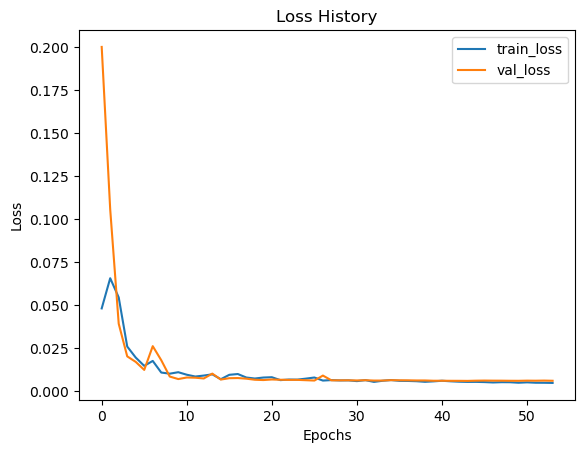

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

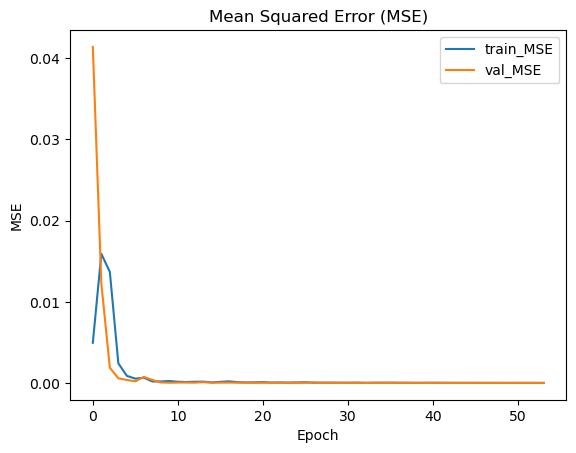

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

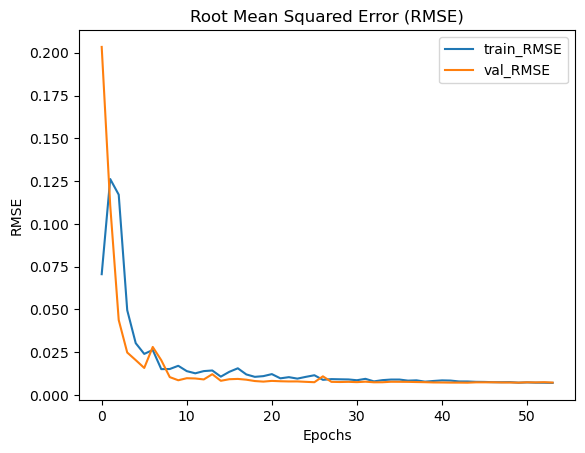

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

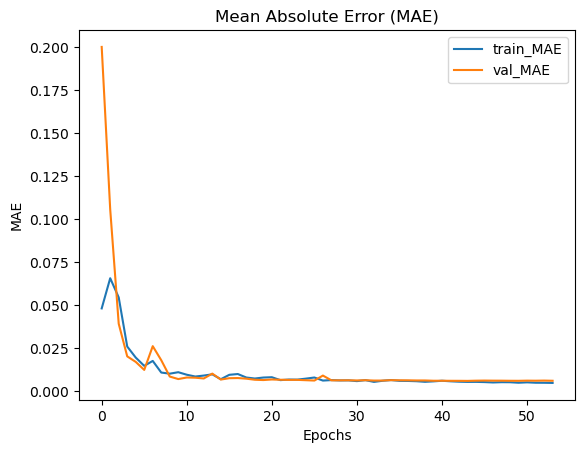

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

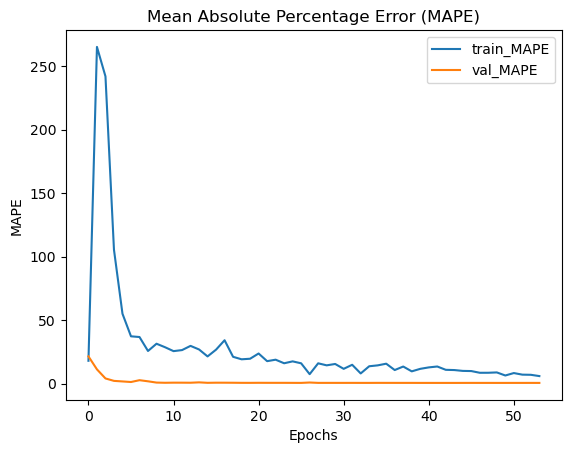

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:09:30.021555: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


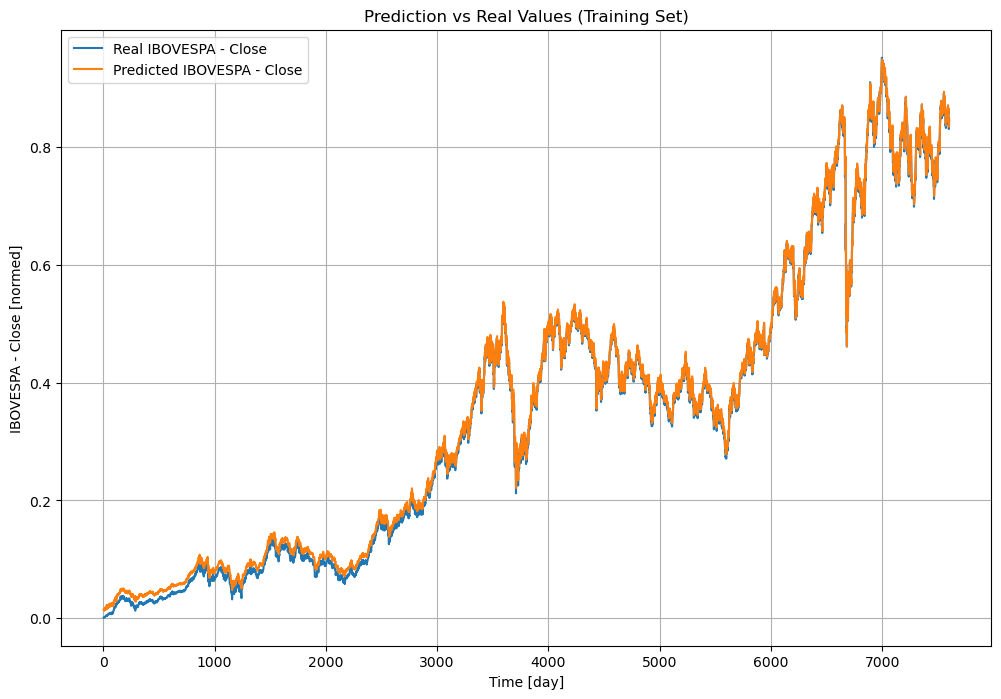

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


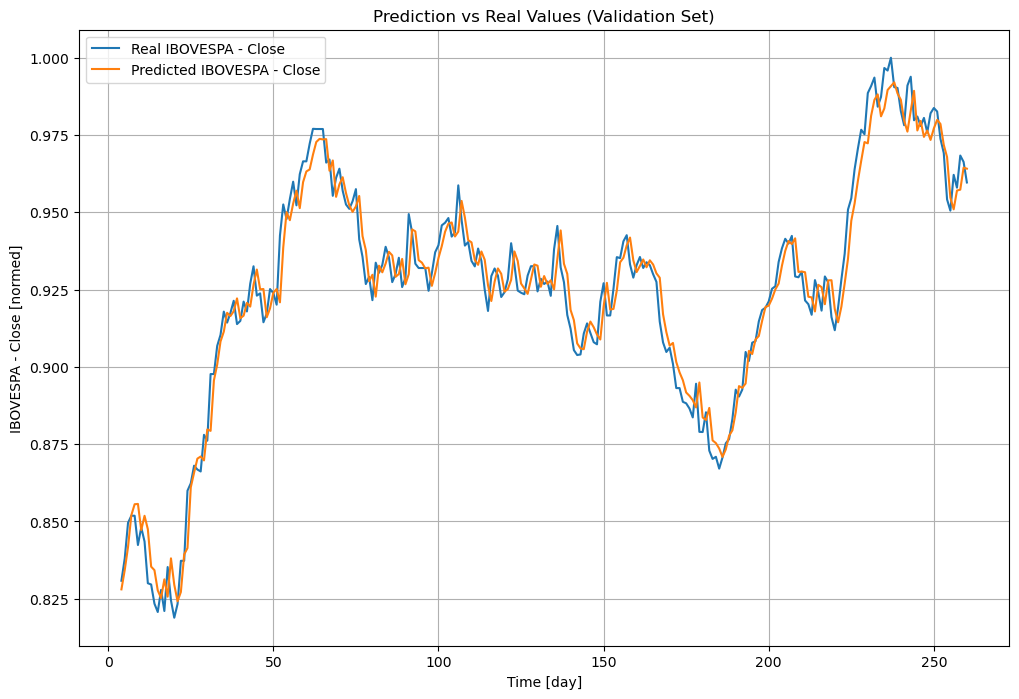

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


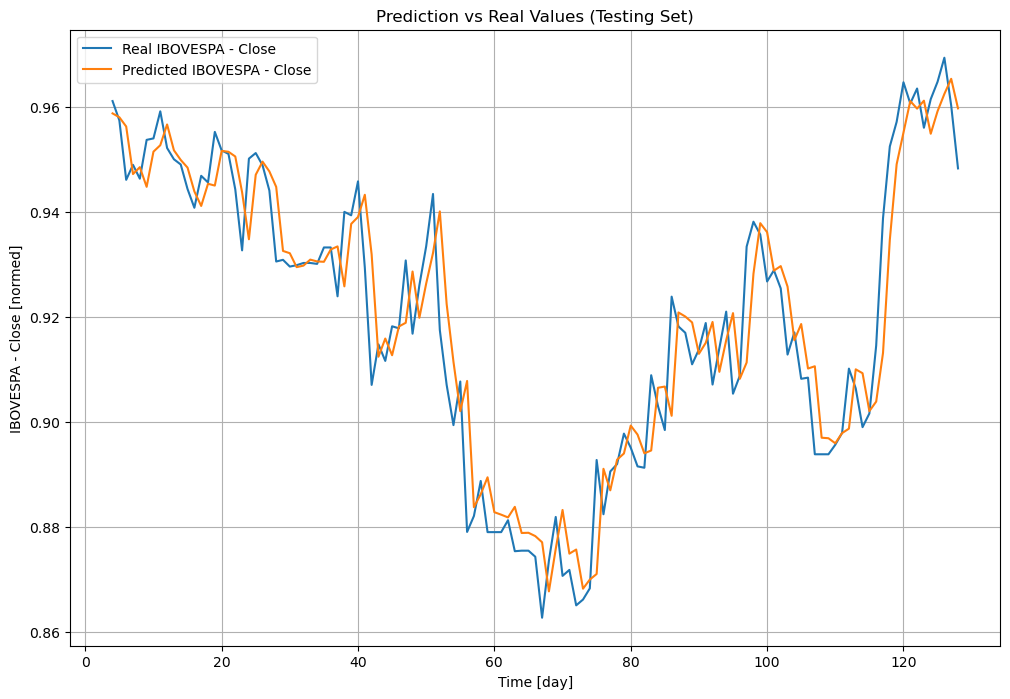

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

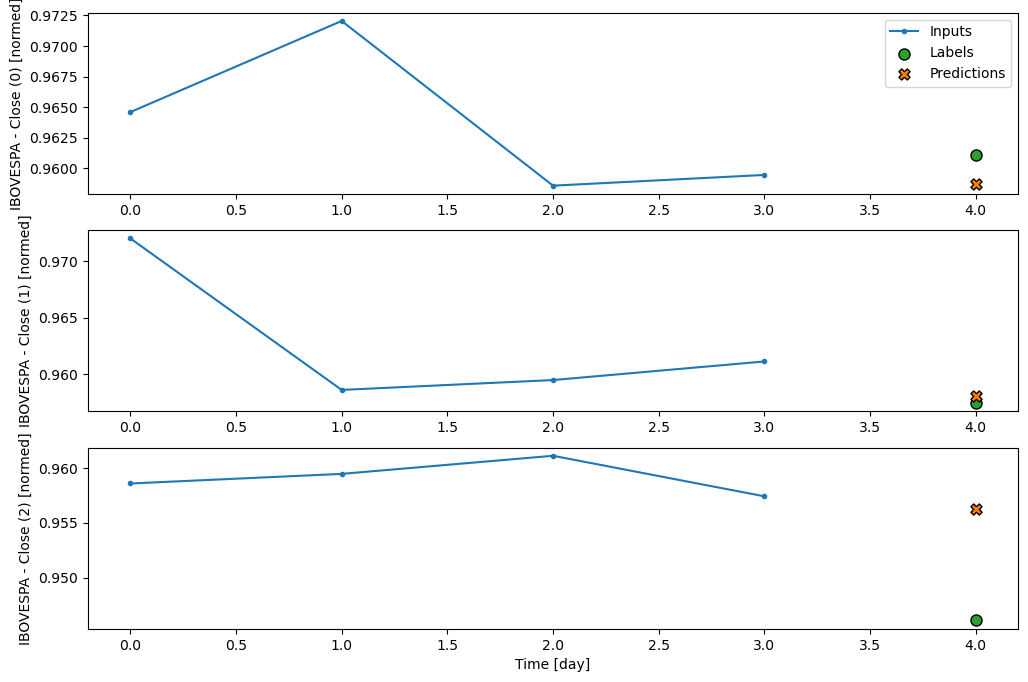

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:15s:516ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[[0.95876336, 0.95876336, 0.95876336, ..., 0.95876336,
         0.95876336, 0.95876336]],

       [[0.9580238 , 0.9580238 , 0.9580238 , ..., 0.9580238 ,
         0.9580238 , 0.9580238 ]],

       [[0.9562669 , 0.9562669 , 0.9562669 , ..., 0.9562669 ,
         0.9562669 , 0.9562669 ]],

       ...,

       [[0.962469  , 0.962469  , 0.962469  , ..., 0.962469  ,
         0.962469  , 0.962469  ]],

       [[0.96535254, 0.96535254, 0.96535254, ..., 0.96535254,
         0.96535254, 0.96535254]],

       [[0.95971787, 0.95971787, 0.95971787, ..., 0.95971787,
         0.95971787, 0.95971787]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')